In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
from IPython.display import clear_output

In [4]:
salary = pd.read_csv("../Data/salary_data_pau.csv")

In [5]:
salary = salary[~salary["Job Type"].isin(["Consulting", "Writing & Journalism", "Unknown"])]

In [6]:
salary["Job Type"].value_counts()

Job Type
Software & IT             2659
Management                1379
Data & Analytics          1318
Sales & Marketing          748
Human Resources            266
Design & Creative          111
Other                       85
Science & Research          76
Operations & Logistics      18
Finance & Accounting        14
Customer Service            12
Name: count, dtype: int64

In [7]:
job_counts = salary["Job Title"].value_counts()
users_with_five_more_jobs = job_counts[job_counts > 5].index

salary = salary[salary["Job Title"].isin(users_with_five_more_jobs)]

In [8]:
salary.shape

(6559, 9)

In [9]:
salary["Job Title"].value_counts().tail()

Job Title
Marketing Specialist               10
Operations Analyst                  8
Business Development Associate      7
Accountant                          6
Customer Service Representative     6
Name: count, dtype: int64

In [10]:
X = salary.drop(columns=['Salary'], axis=1)  
y = salary['Salary'].values
job_title = salary['Job Title'].values

In [11]:
# Por ejemplo, primero 80% train_val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Luego, dentro del train_val, reservar 25% para validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

In [12]:
salary["Gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
encoder = LabelEncoder()


columns_to_encode = ["Job Title", "Job Category", "Education Level", "Job Type", "Gender"]
for col in columns_to_encode:
    encoder.fit(X_train[col]) 
    X_train[col] = encoder.transform(X_train[col])
    X_val[col] = encoder.transform(X_val[col])
    X_test[col] = encoder.transform(X_test[col])

In [14]:
# Escalar únicamente las variables numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [17]:
# Convertir las características a tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Convertir las etiquetas a tensores (asegurarse de que tengan la forma correcta)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [24]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(8, 16)  # Cambia 13 por 8
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [19]:
class RegressionEmbeddingNN(nn.Module):
    NUM_FEATURES = 6
    NUM_JOB_TITLES = 191
    EMBEDDING_DIMENSIONS = 10

    def __init__(self):
        super().__init__()
        self.embedding = nn.Embedding(num_embeddings=self.NUM_JOB_TITLES, embedding_dim=self.EMBEDDING_DIMENSIONS)
        
        self.fc1 = nn.Linear(self.NUM_FEATURES + self.EMBEDDING_DIMENSIONS, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)

        self.relu = nn.ReLU()

    def forward(self, x, x_job_title):
        emb = self.embedding(x_job_title)
        emb = emb.view(emb.size(0), -1)  
        x = torch.cat([x, emb], dim=1)  # concatenamos

        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [26]:
# Inicializar modelo, pérdida y optimizador
model = NeuralNetwork()
# criterion = nn.MSELoss()
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

Epoch [500/50000] Train Loss: 115123.1016 Val Loss: 115673.6328


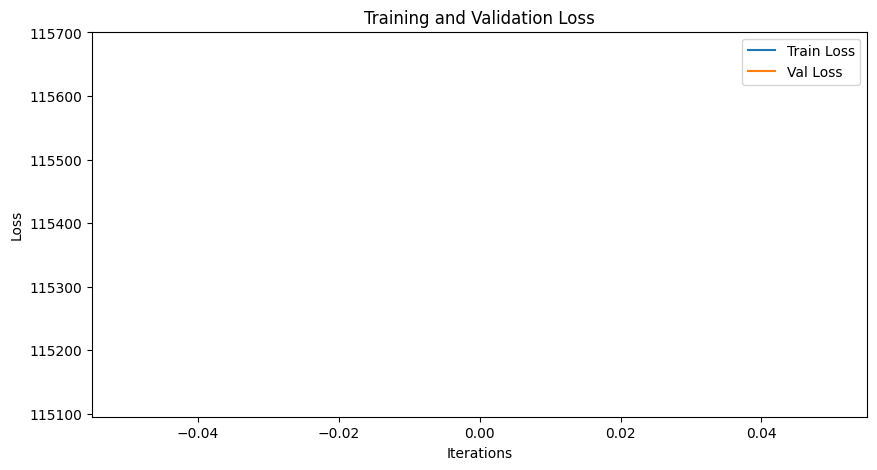

Epoch [1000/50000] Train Loss: 113861.2188 Val Loss: 114423.4141


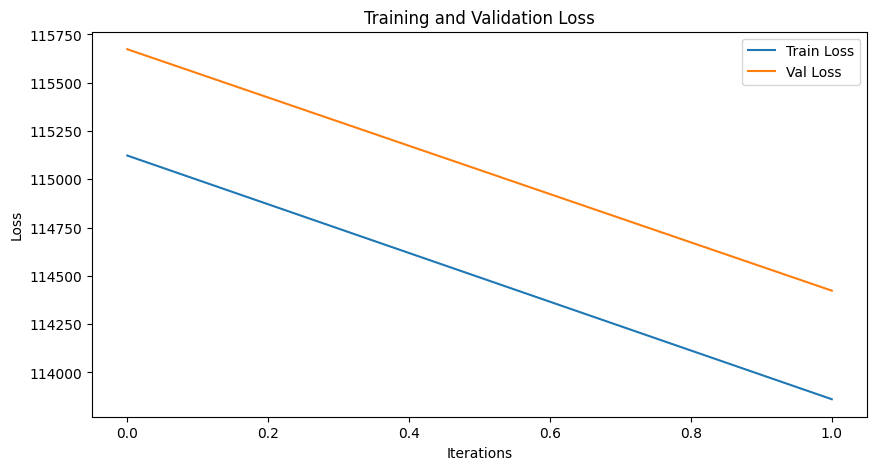

Epoch [1500/50000] Train Loss: 110787.4141 Val Loss: 111381.0234


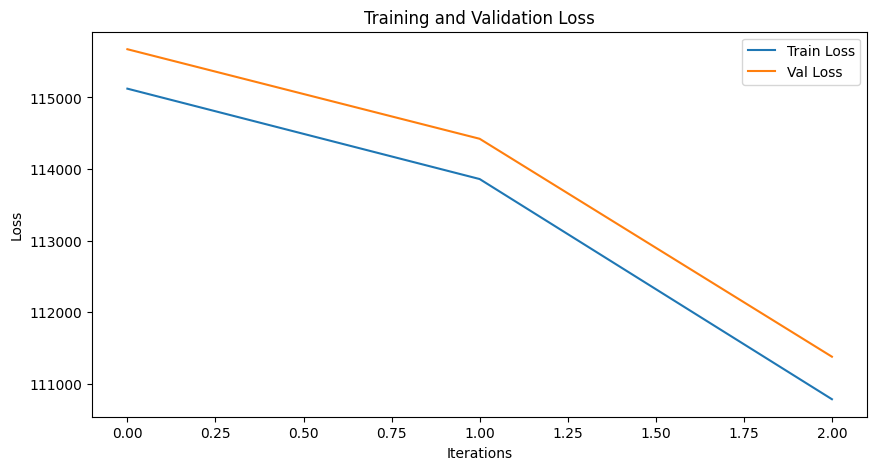

Epoch [2000/50000] Train Loss: 105473.5156 Val Loss: 106123.0234


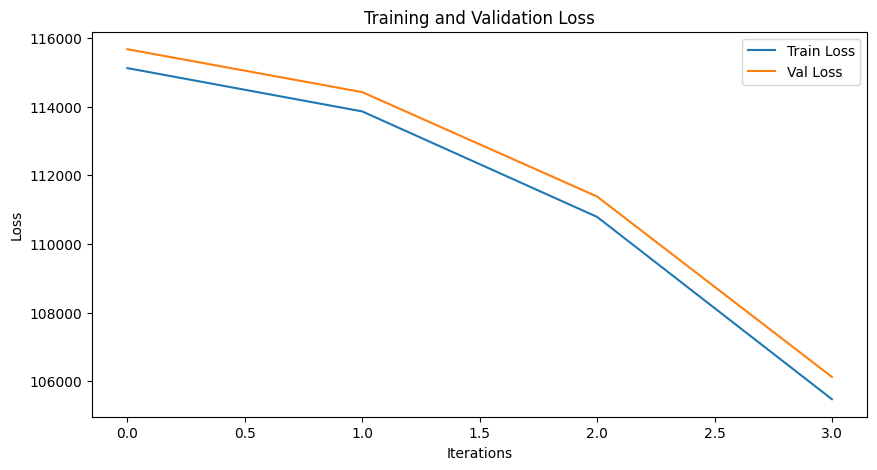

Epoch [2500/50000] Train Loss: 97645.9062 Val Loss: 98378.7266


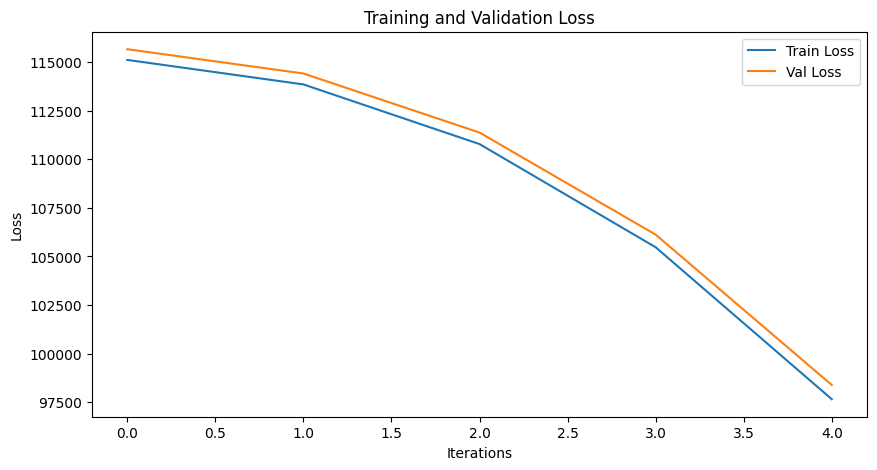

Epoch [3000/50000] Train Loss: 87225.9141 Val Loss: 88059.2344


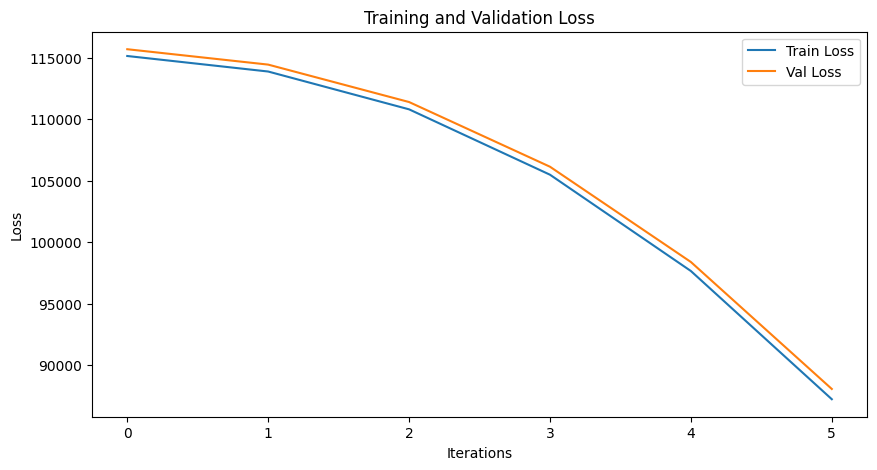

Epoch [3500/50000] Train Loss: 74926.3359 Val Loss: 75830.4141


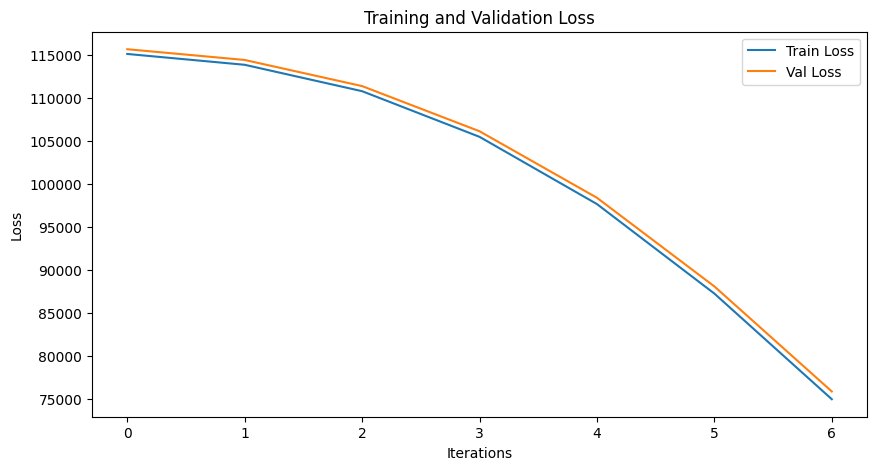

Epoch [4000/50000] Train Loss: 61586.6680 Val Loss: 62508.5859


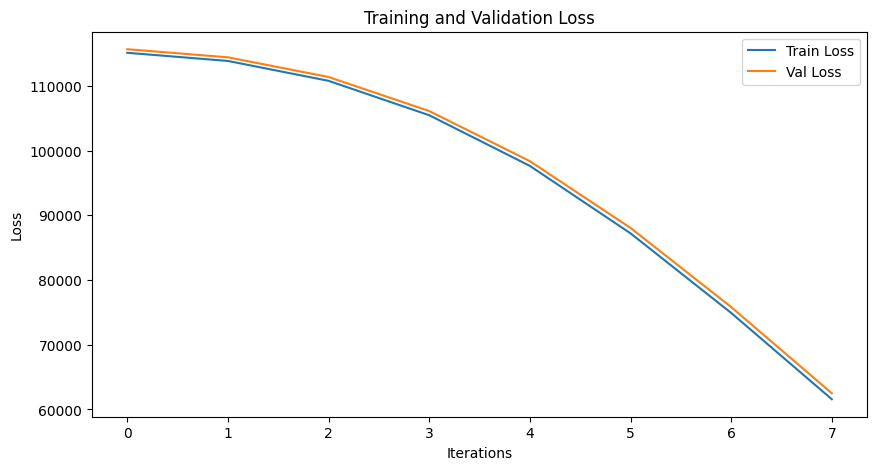

Epoch [4500/50000] Train Loss: 48754.9297 Val Loss: 49554.4219


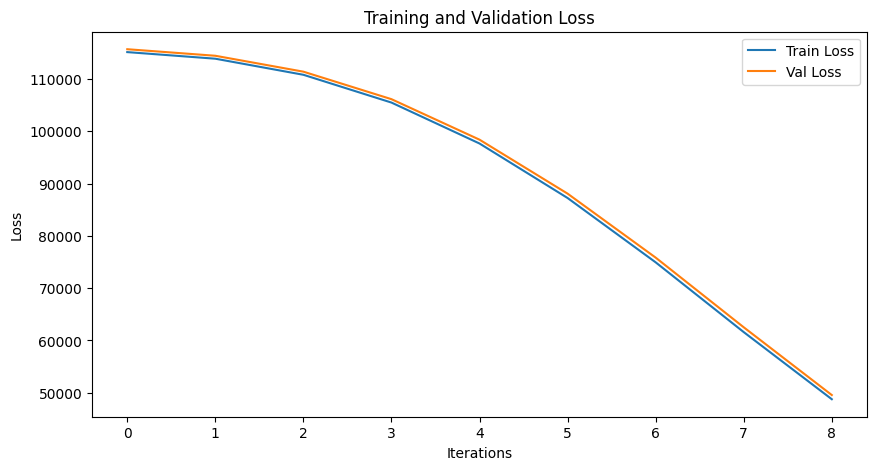

Epoch [5000/50000] Train Loss: 38989.6875 Val Loss: 39975.5664


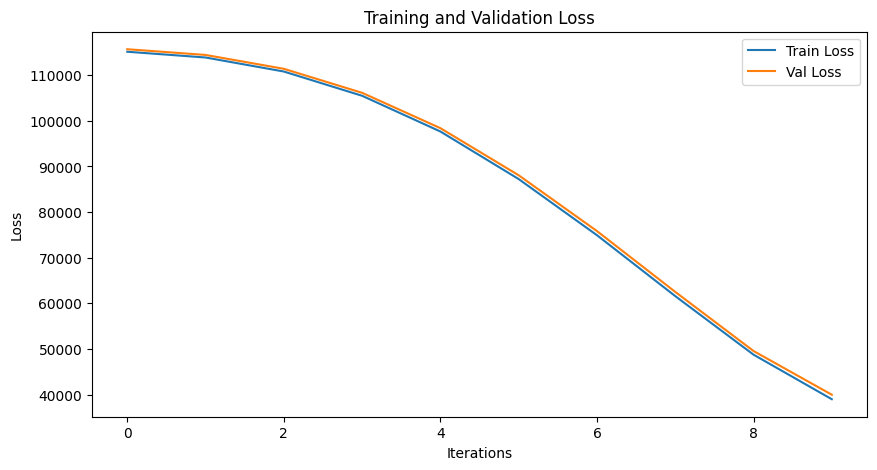

Epoch [5500/50000] Train Loss: 34977.8086 Val Loss: 35733.9570


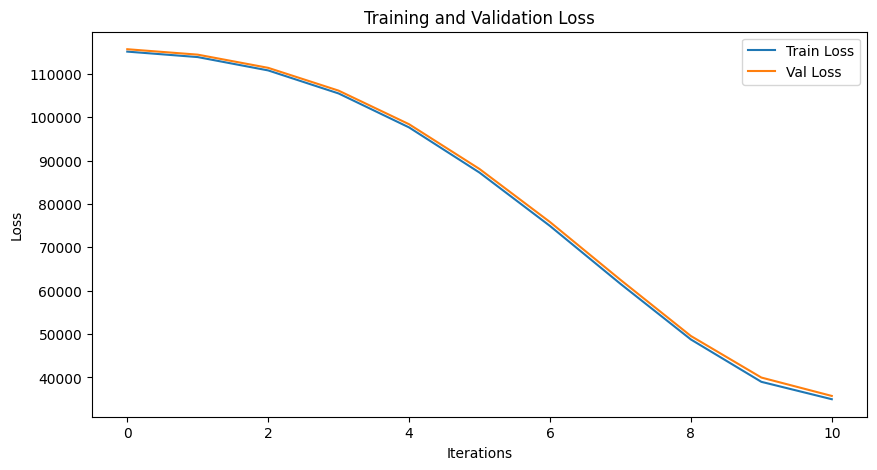

Epoch [6000/50000] Train Loss: 32779.8203 Val Loss: 33314.7539


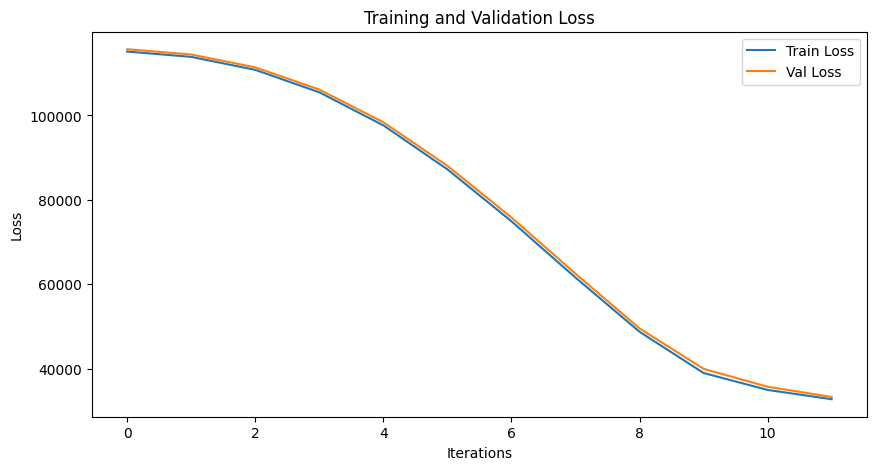

Epoch [6500/50000] Train Loss: 30883.6719 Val Loss: 31281.1426


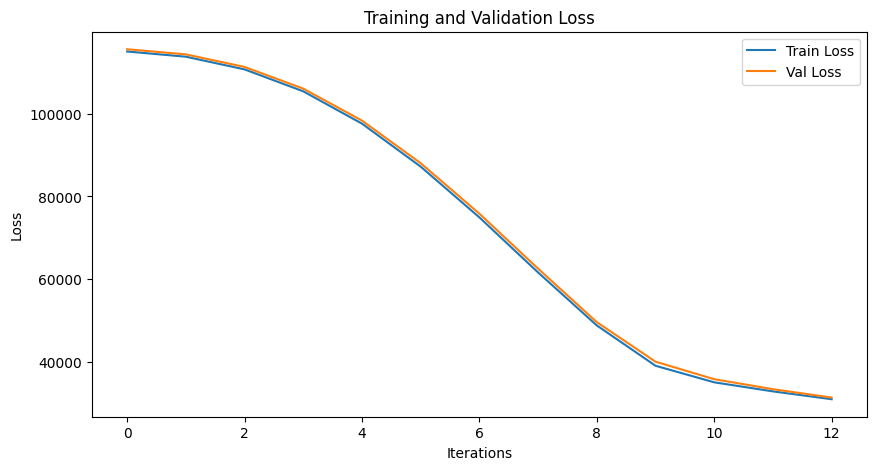

Epoch [7000/50000] Train Loss: 29115.6133 Val Loss: 29442.2402


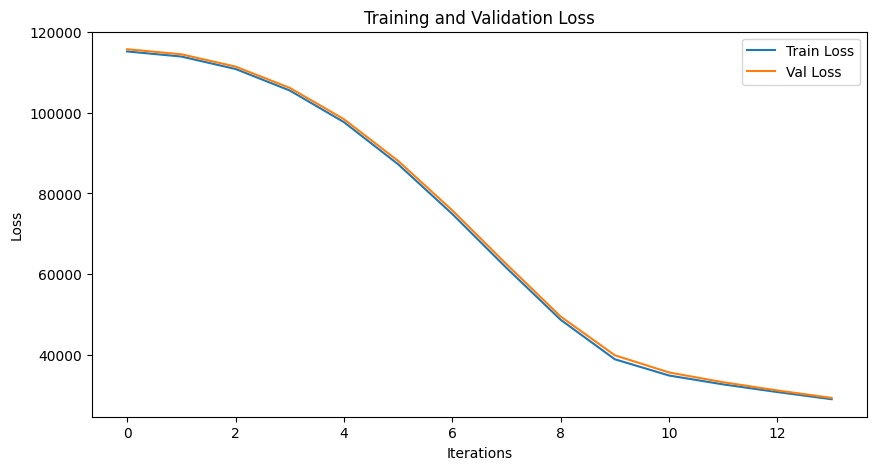

Epoch [7500/50000] Train Loss: 27540.9082 Val Loss: 27824.5039


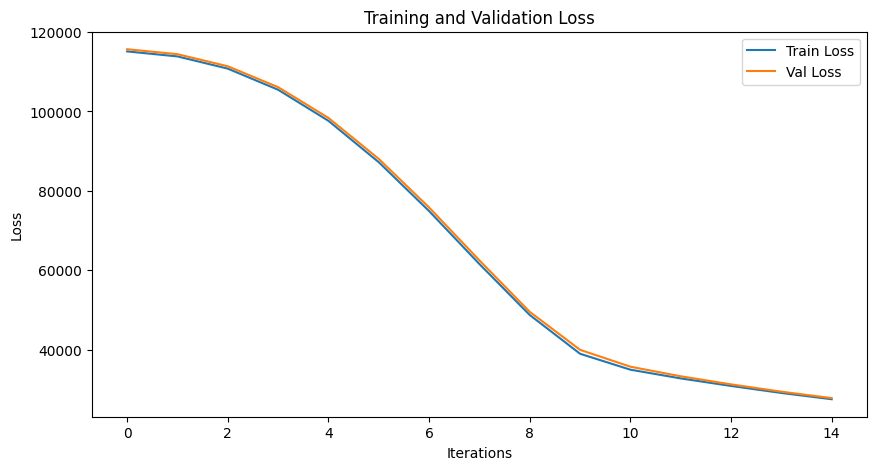

Epoch [8000/50000] Train Loss: 26162.9531 Val Loss: 26414.4941


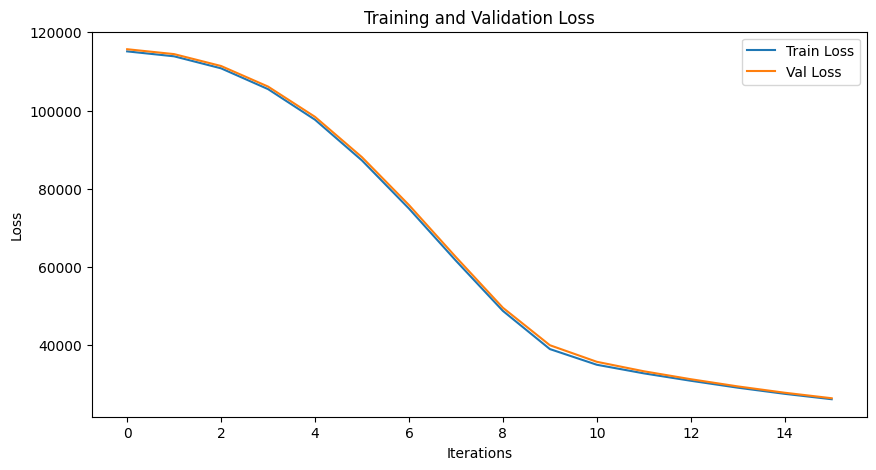

Epoch [8500/50000] Train Loss: 24969.0957 Val Loss: 25176.5312


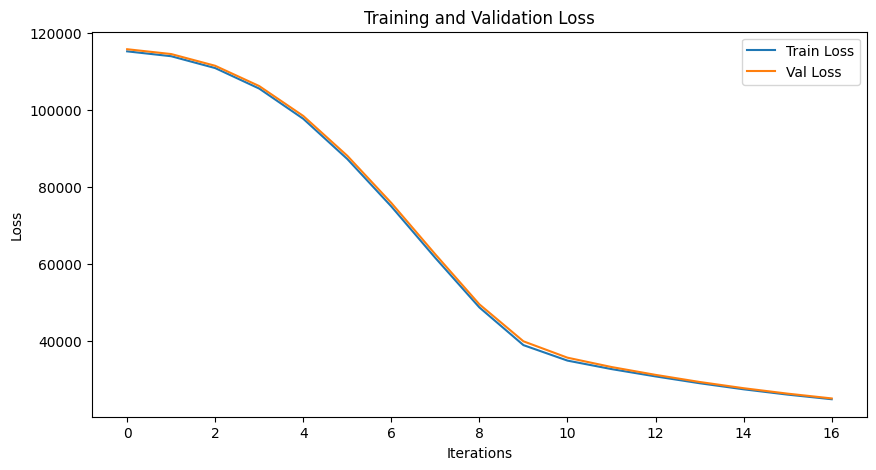

Epoch [9000/50000] Train Loss: 23956.1465 Val Loss: 24135.0020


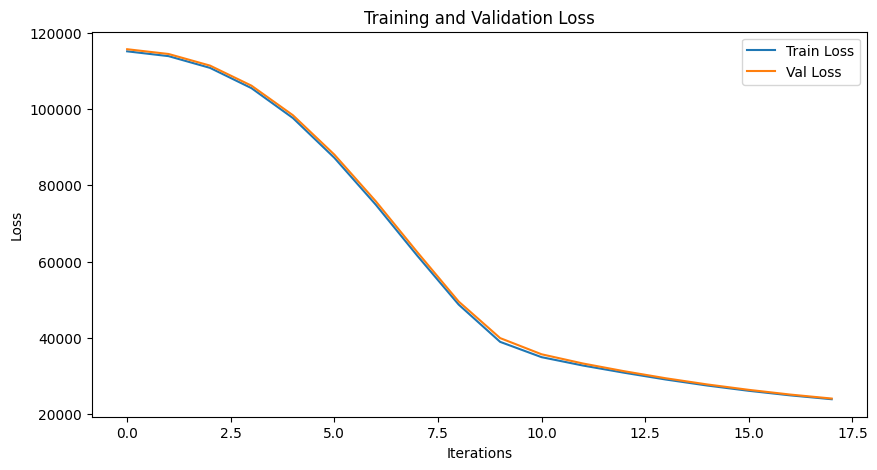

Epoch [9500/50000] Train Loss: 22972.3125 Val Loss: 23153.2168


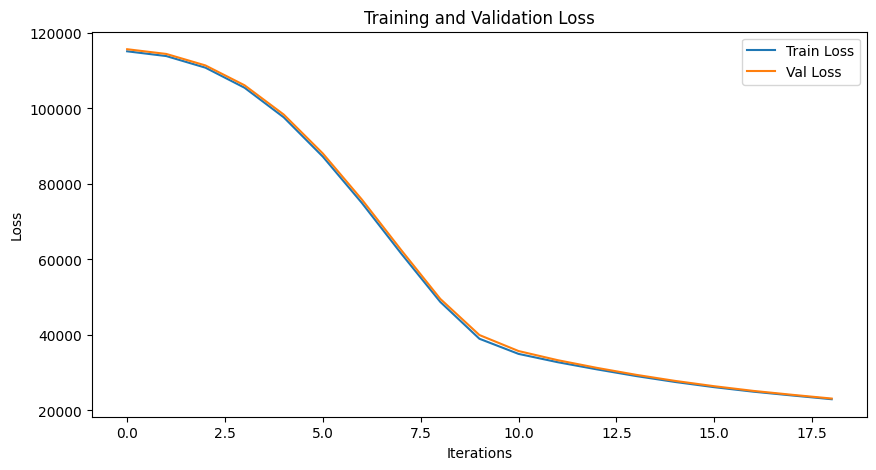

Epoch [10000/50000] Train Loss: 22094.7363 Val Loss: 22278.2734


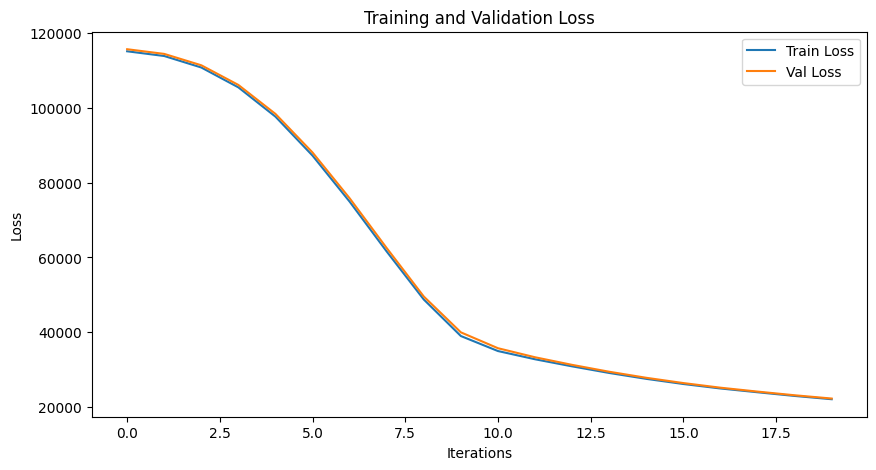

Epoch [10500/50000] Train Loss: 21245.1504 Val Loss: 21444.6211


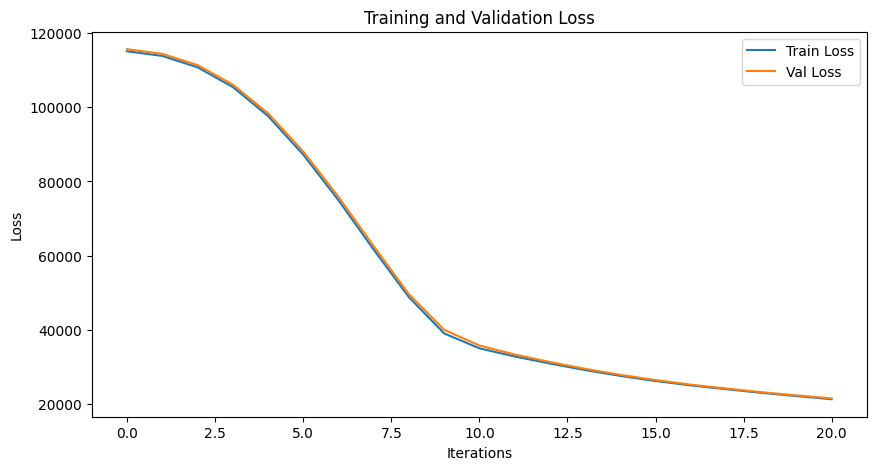

Epoch [11000/50000] Train Loss: 20536.0312 Val Loss: 20771.1270


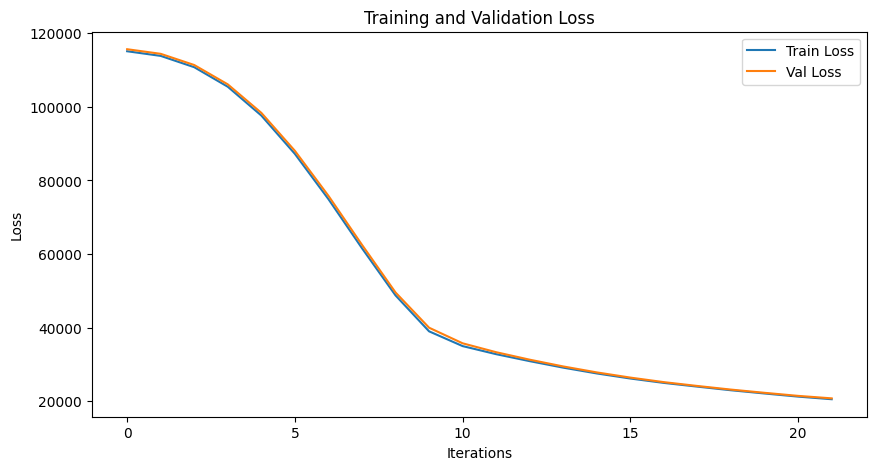

Epoch [11500/50000] Train Loss: 19915.6836 Val Loss: 20167.5938


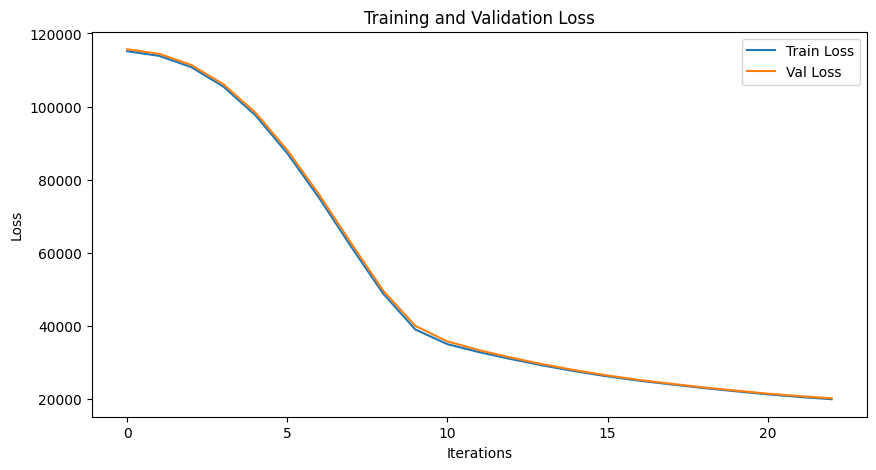

Epoch [12000/50000] Train Loss: 19342.5391 Val Loss: 19612.4141


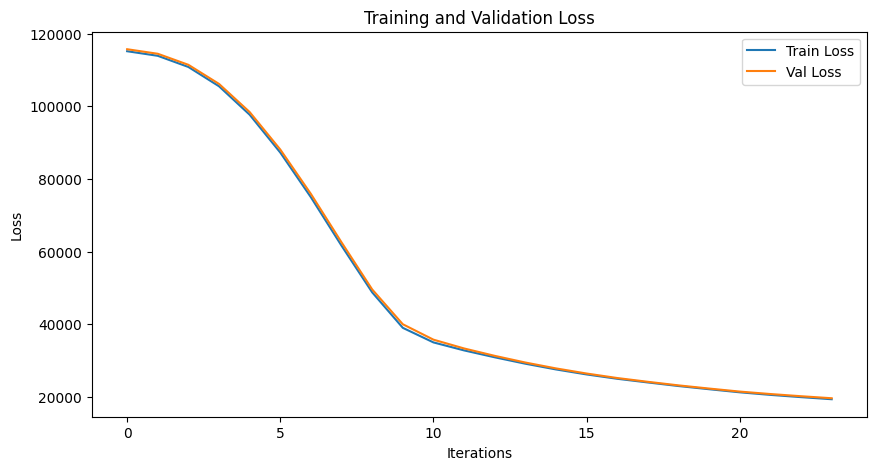

Epoch [12500/50000] Train Loss: 18793.8496 Val Loss: 19064.7852


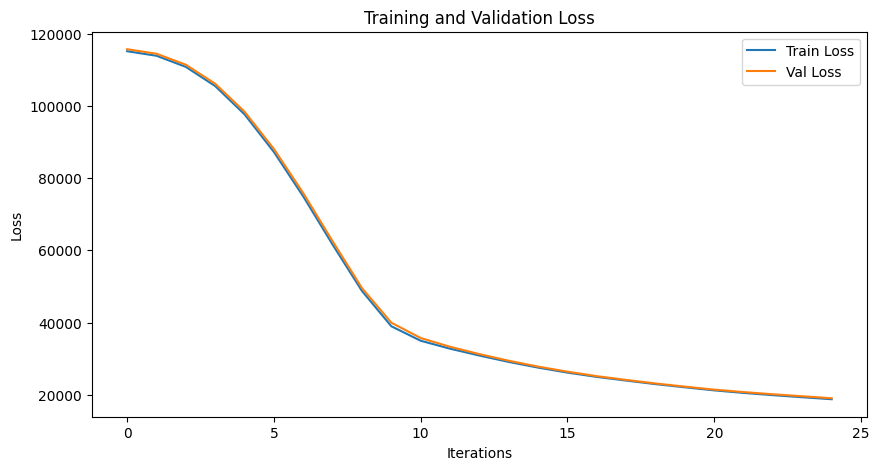

Epoch [13000/50000] Train Loss: 18202.7500 Val Loss: 18488.8516


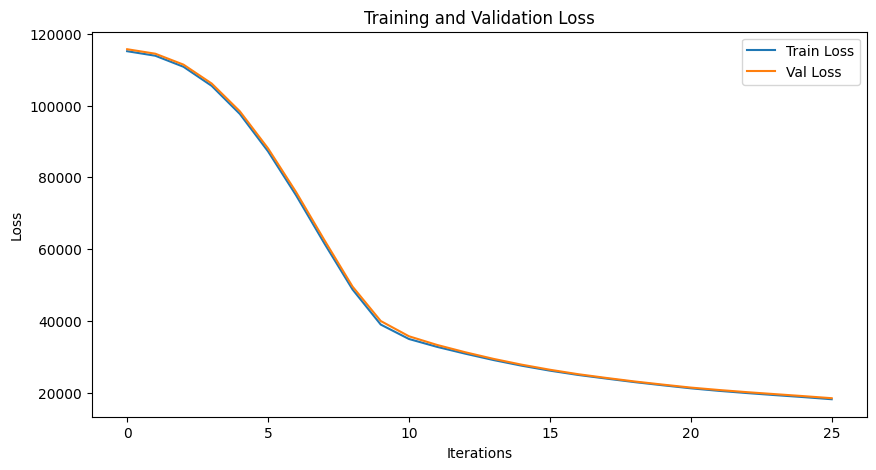

Epoch [13500/50000] Train Loss: 17641.1055 Val Loss: 17942.0176


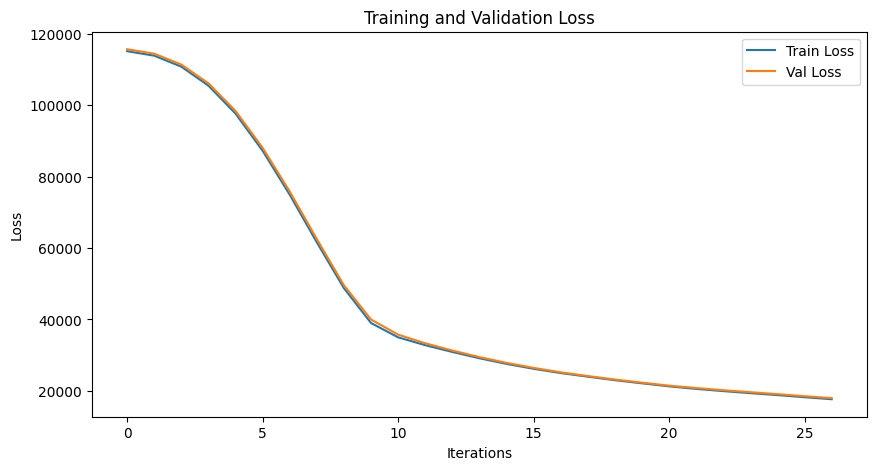

Epoch [14000/50000] Train Loss: 17158.7422 Val Loss: 17475.6035


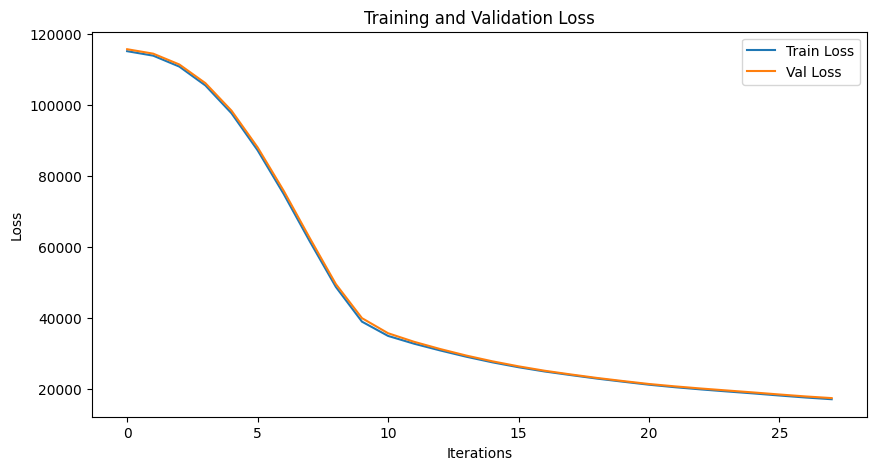

Epoch [14500/50000] Train Loss: 16619.9219 Val Loss: 16954.6445


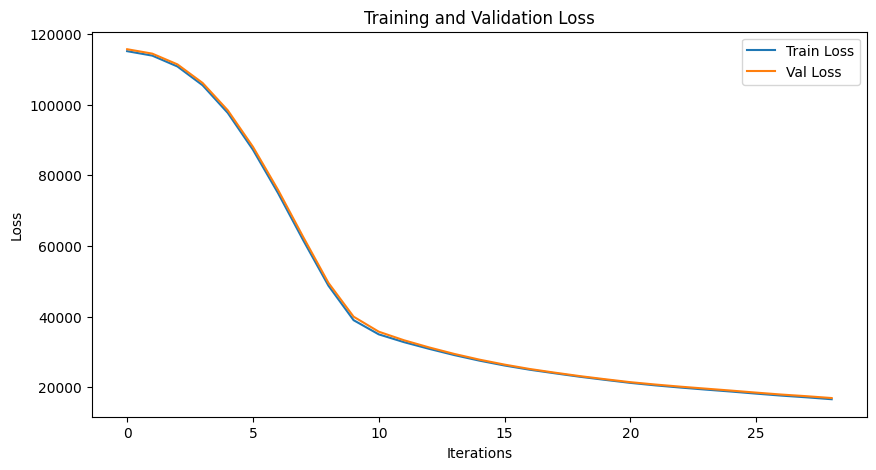

Epoch [15000/50000] Train Loss: 16086.7432 Val Loss: 16459.2832


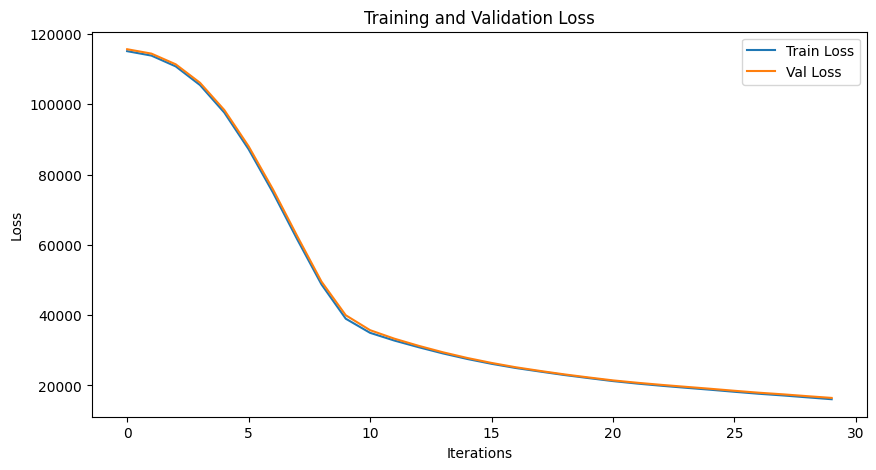

Epoch [15500/50000] Train Loss: 15584.7217 Val Loss: 15968.7061


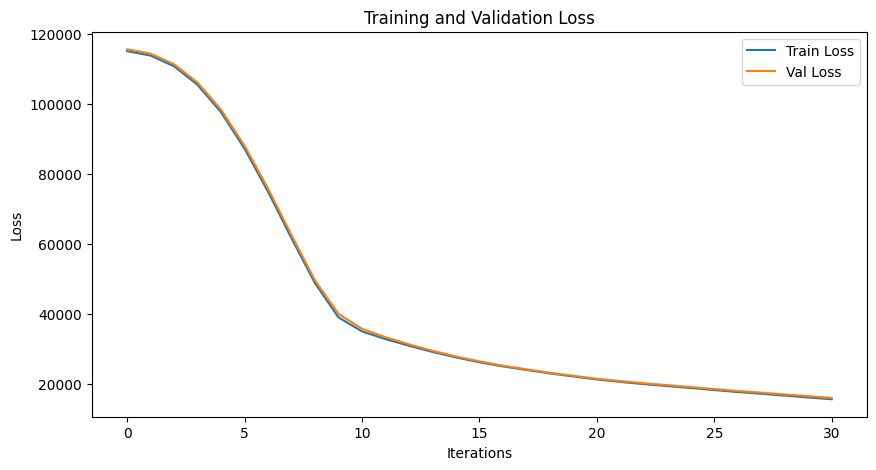

Epoch [16000/50000] Train Loss: 15135.3564 Val Loss: 15533.0986


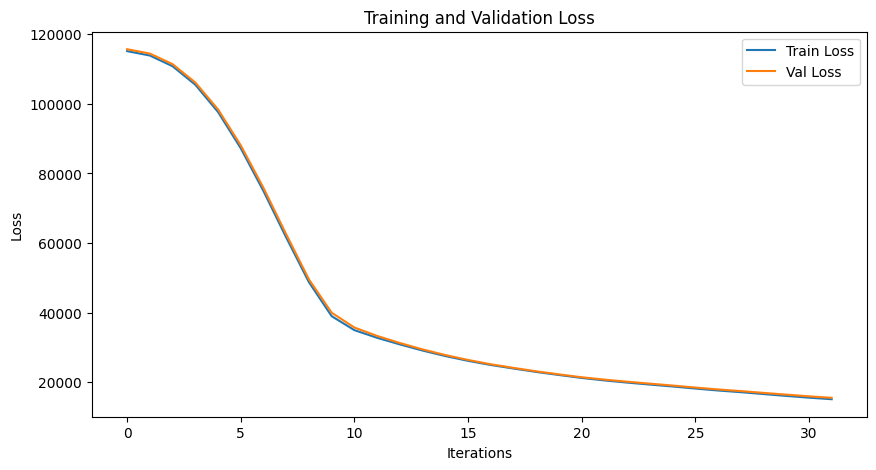

Epoch [16500/50000] Train Loss: 14738.0586 Val Loss: 15131.0566


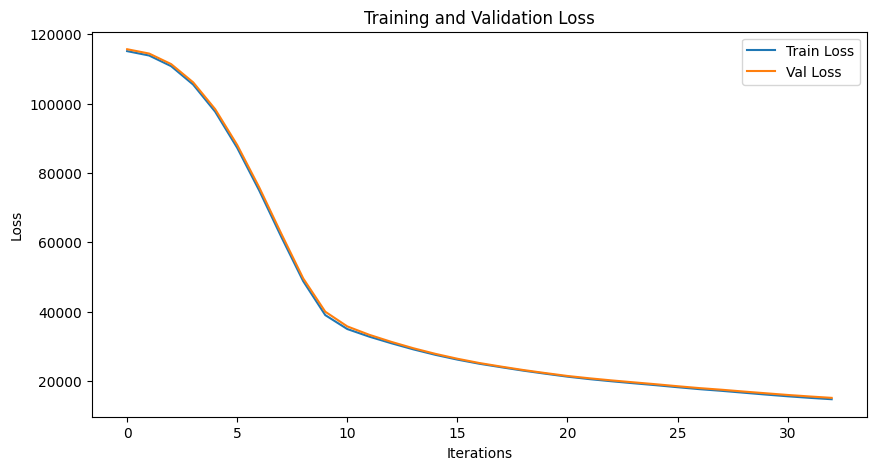

Epoch [17000/50000] Train Loss: 14339.0117 Val Loss: 14733.7363


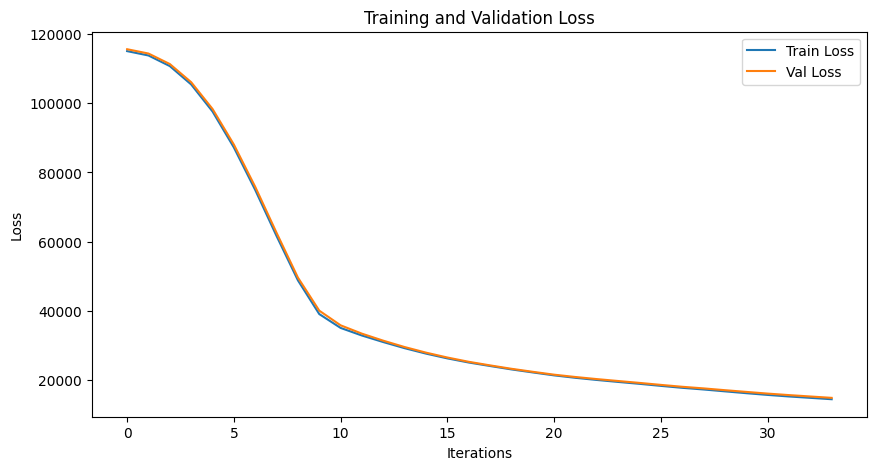

Epoch [17500/50000] Train Loss: 13921.9639 Val Loss: 14319.3145


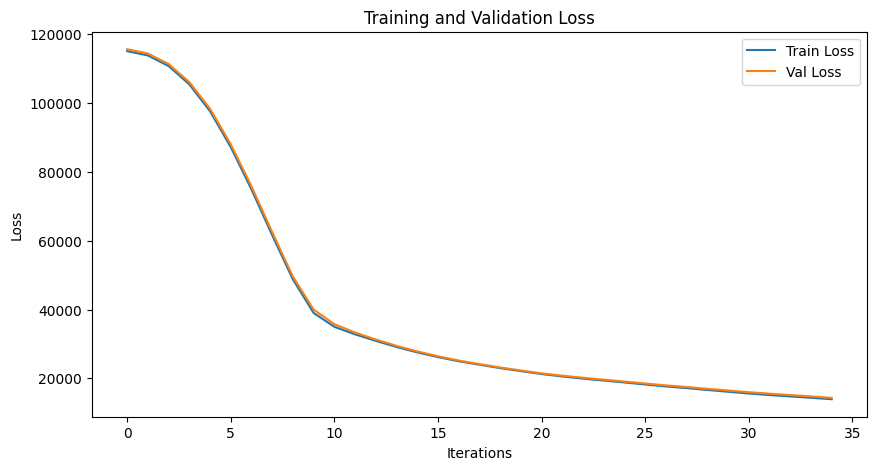

Epoch [18000/50000] Train Loss: 13544.8672 Val Loss: 13905.0439


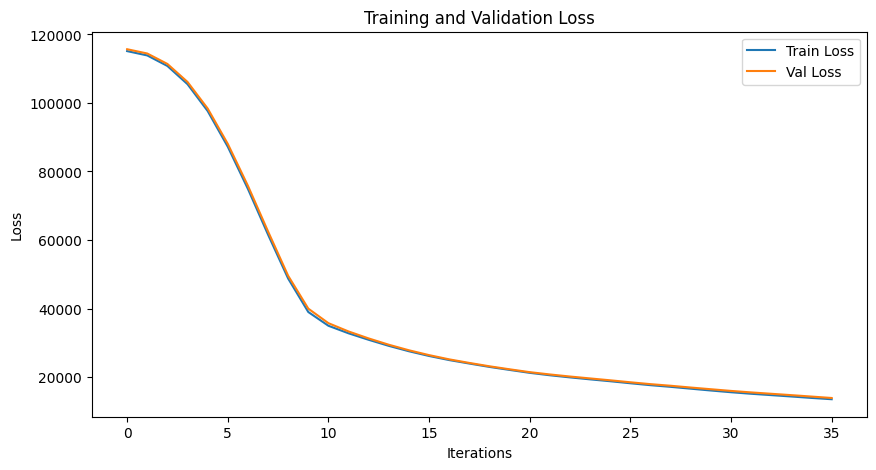

Epoch [18500/50000] Train Loss: 13218.3887 Val Loss: 13571.5225


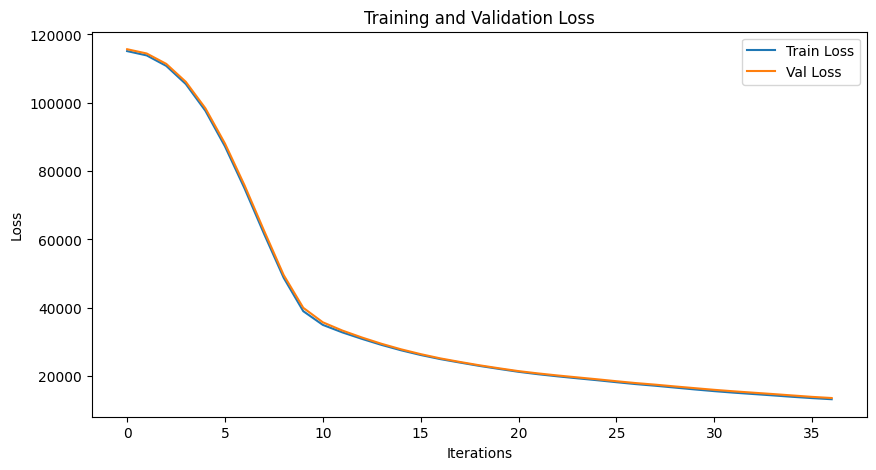

Epoch [19000/50000] Train Loss: 12916.7539 Val Loss: 13288.3506


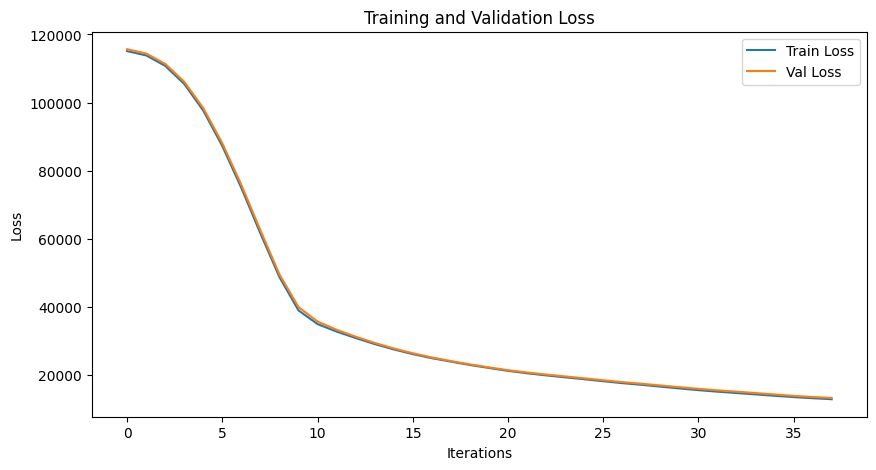

Epoch [19500/50000] Train Loss: 12624.7236 Val Loss: 13011.4023


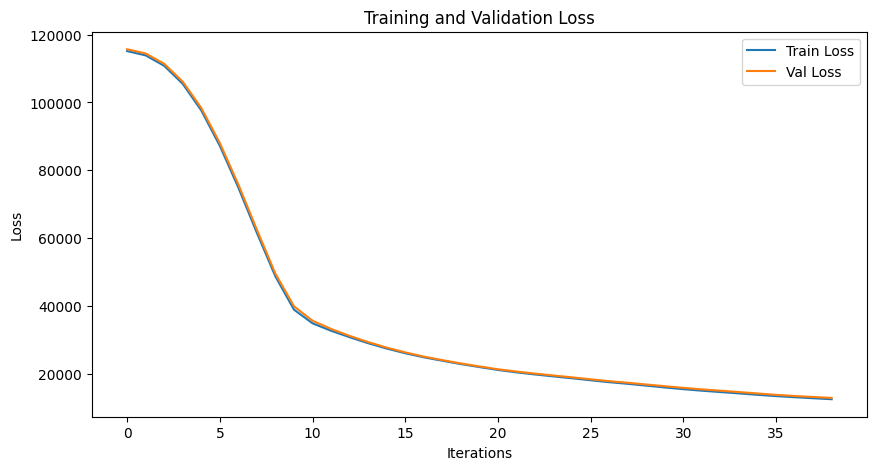

Epoch [20000/50000] Train Loss: 12312.8643 Val Loss: 12687.8896


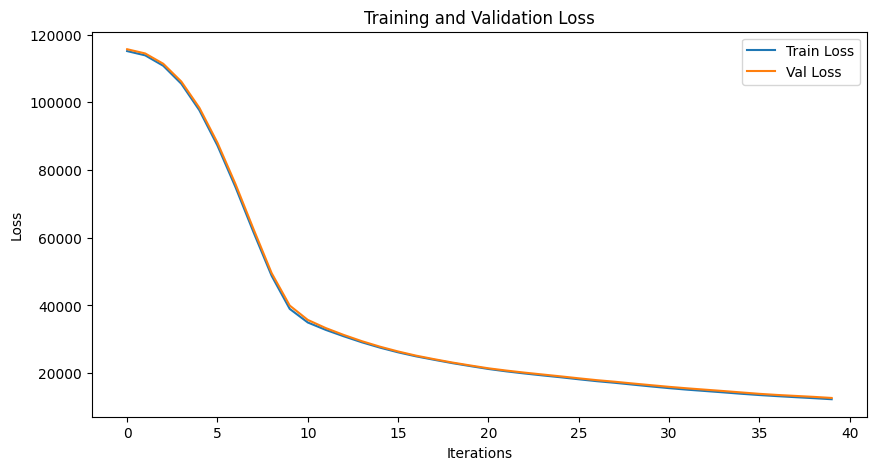

Epoch [20500/50000] Train Loss: 11974.3203 Val Loss: 12337.9160


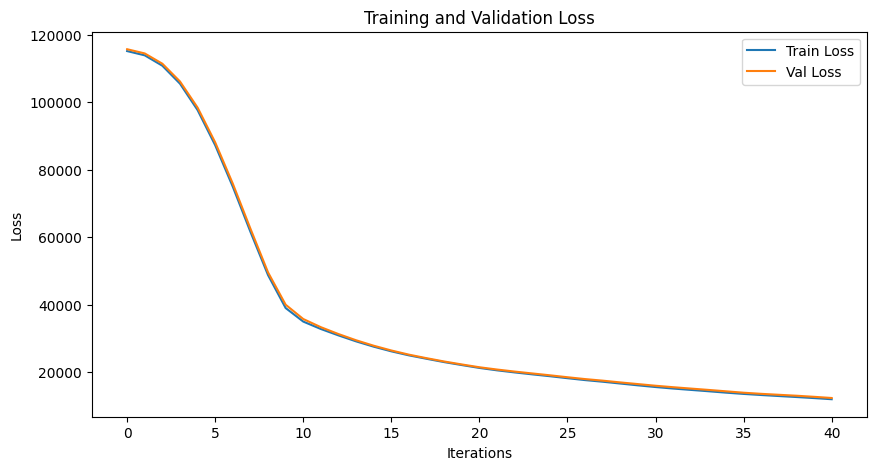

Epoch [21000/50000] Train Loss: 11630.9062 Val Loss: 11963.0469


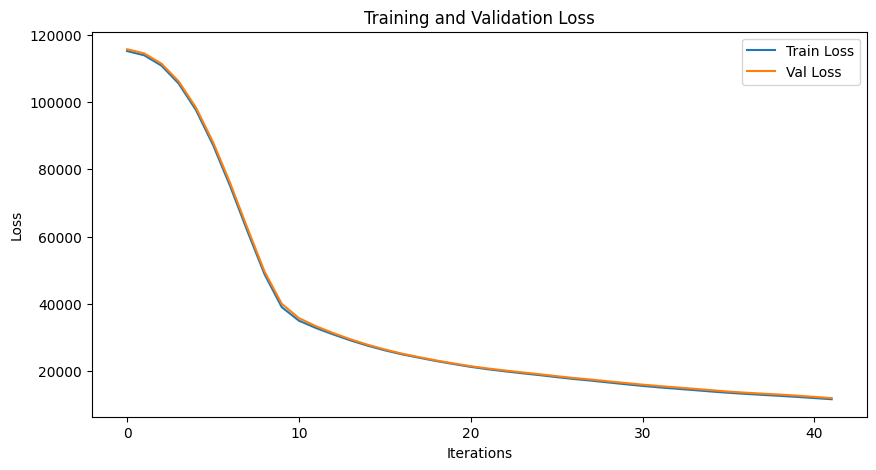

Epoch [21500/50000] Train Loss: 11324.2783 Val Loss: 11628.7939


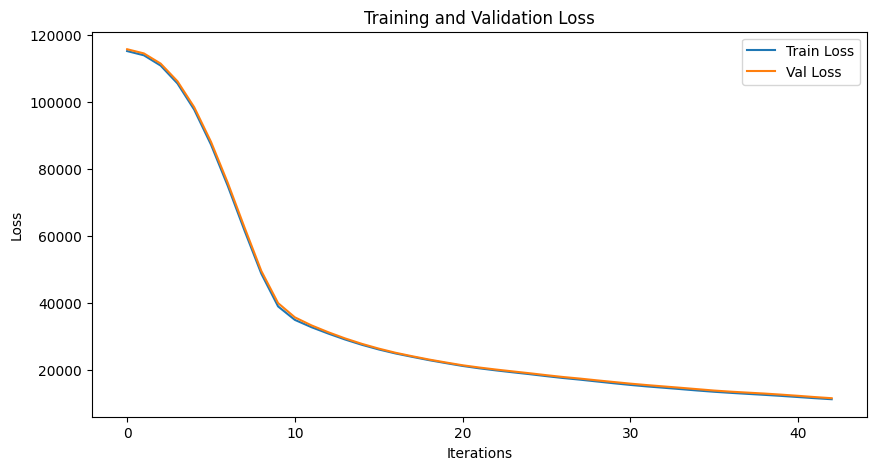

Epoch [22000/50000] Train Loss: 11049.6309 Val Loss: 11346.3779


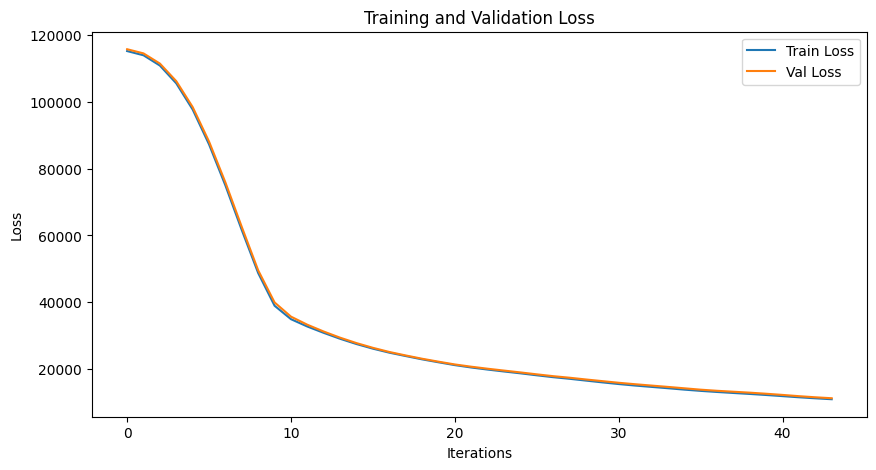

Epoch [22500/50000] Train Loss: 10809.1973 Val Loss: 11091.7266


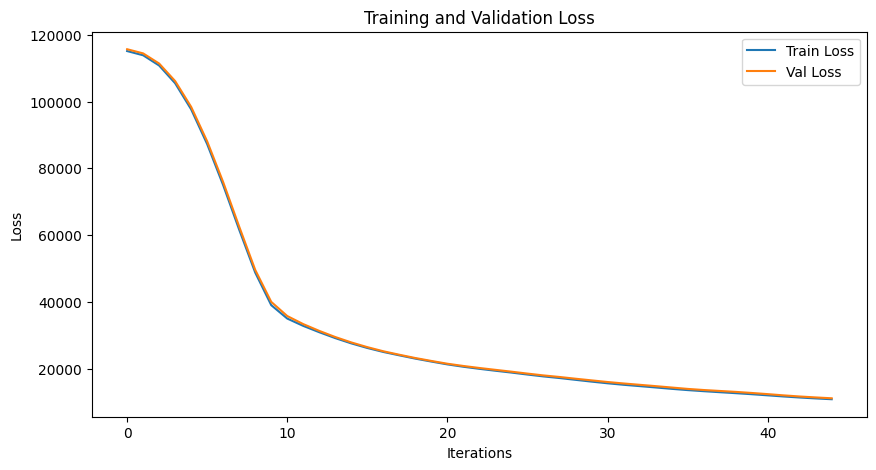

Epoch [23000/50000] Train Loss: 10554.1172 Val Loss: 10812.4834


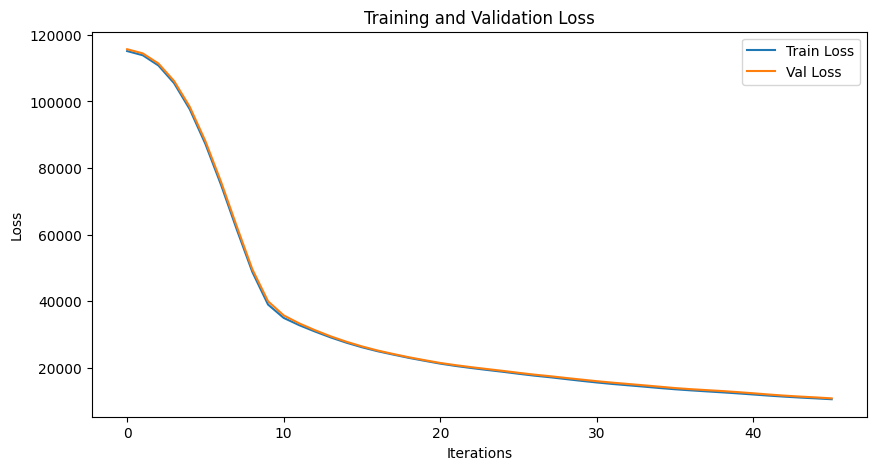

Epoch [23500/50000] Train Loss: 10329.1689 Val Loss: 10594.8320


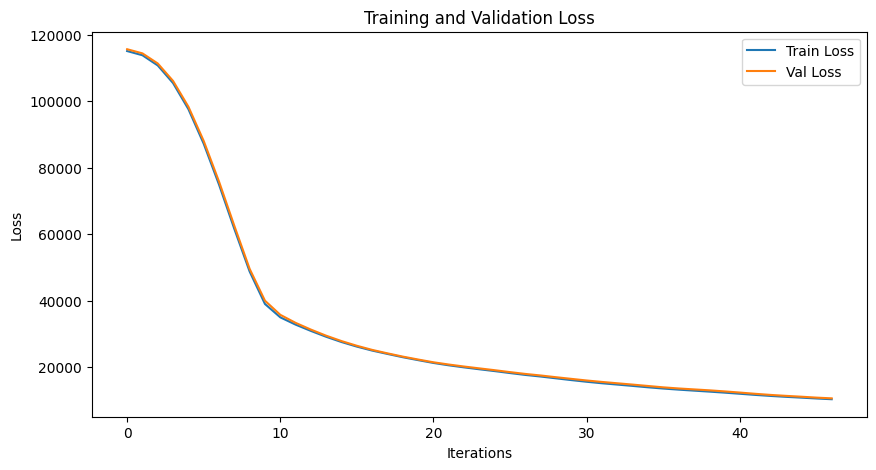

Epoch [24000/50000] Train Loss: 10147.1982 Val Loss: 10428.7500


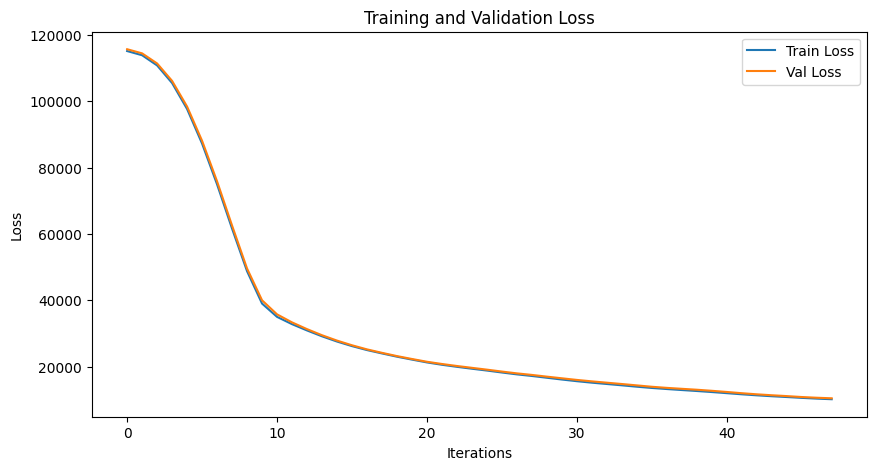

Epoch [24500/50000] Train Loss: 10016.6299 Val Loss: 10319.6006


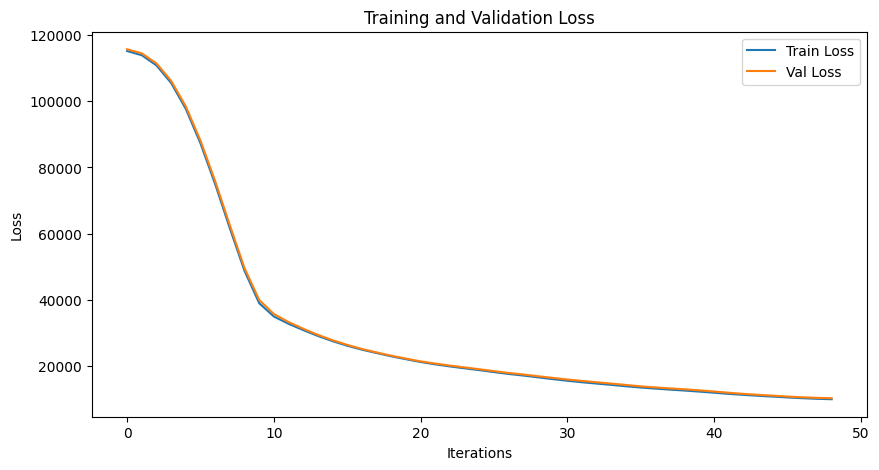

Epoch [25000/50000] Train Loss: 9904.1289 Val Loss: 10223.1992


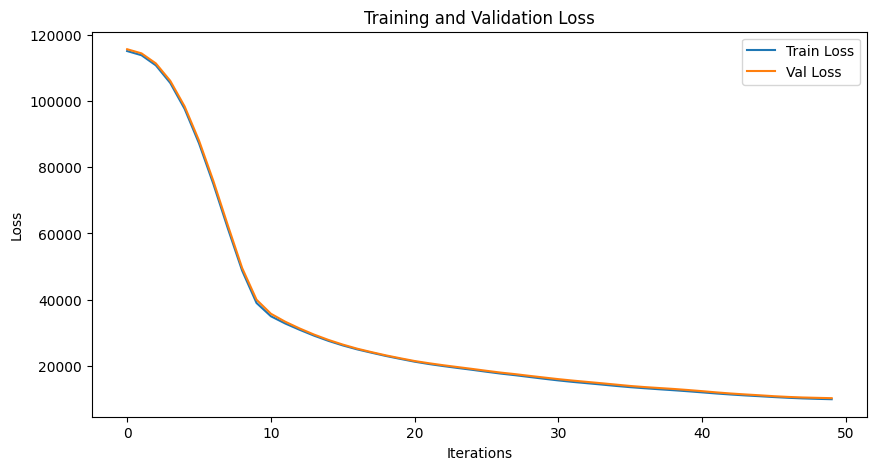

Epoch [25500/50000] Train Loss: 9754.5859 Val Loss: 10034.3340


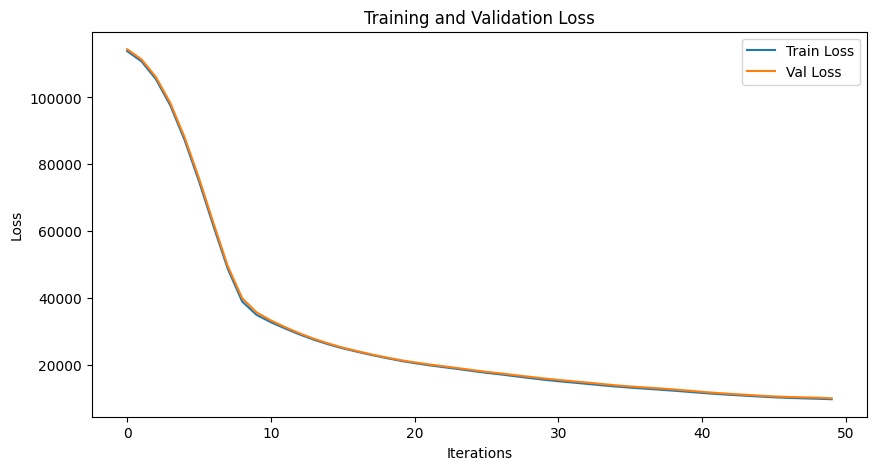

Epoch [26000/50000] Train Loss: 9601.9102 Val Loss: 9839.3301


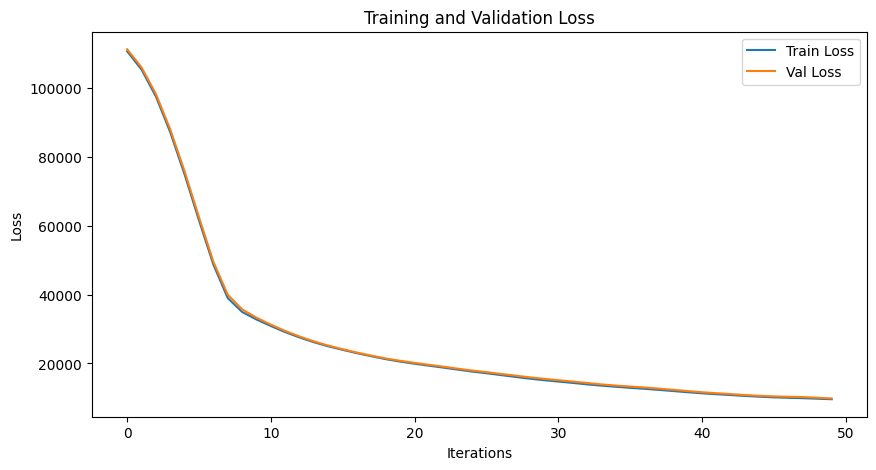

Epoch [26500/50000] Train Loss: 9482.2500 Val Loss: 9708.8838


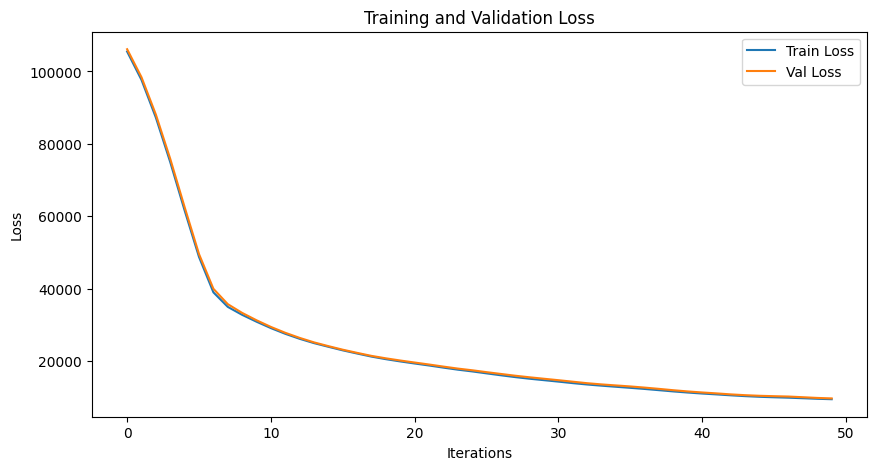

Epoch [27000/50000] Train Loss: 9371.7422 Val Loss: 9584.0518


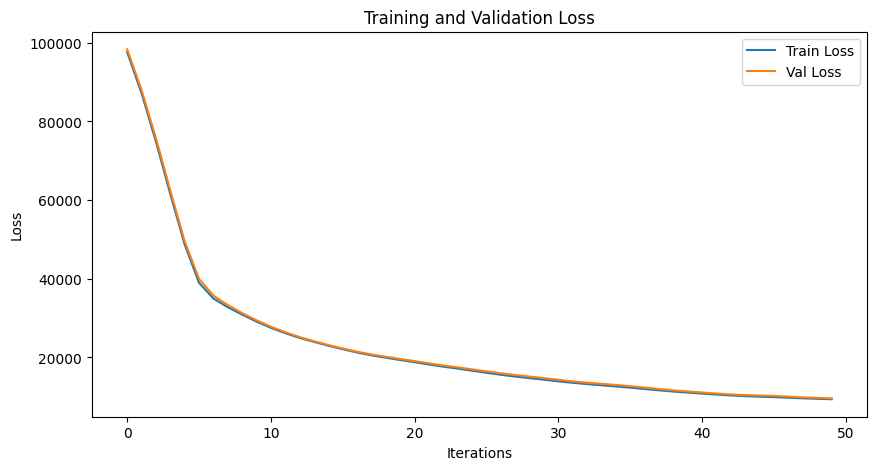

Epoch [27500/50000] Train Loss: 9272.5859 Val Loss: 9469.6152


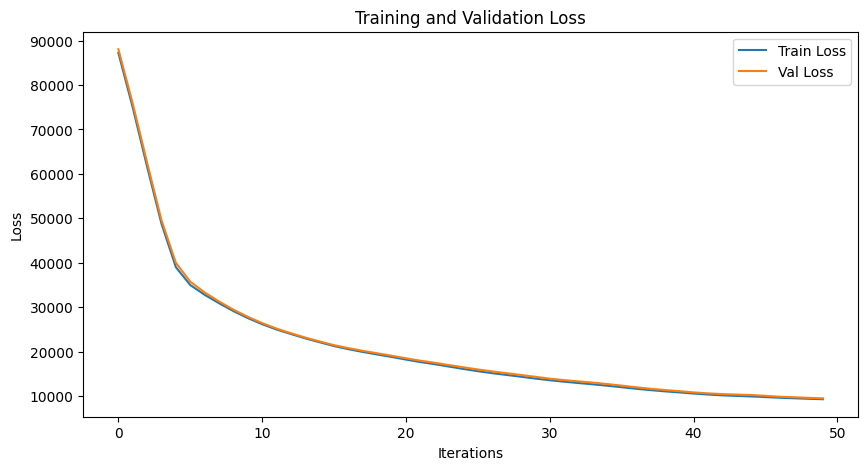

Epoch [28000/50000] Train Loss: 9178.8584 Val Loss: 9370.3887


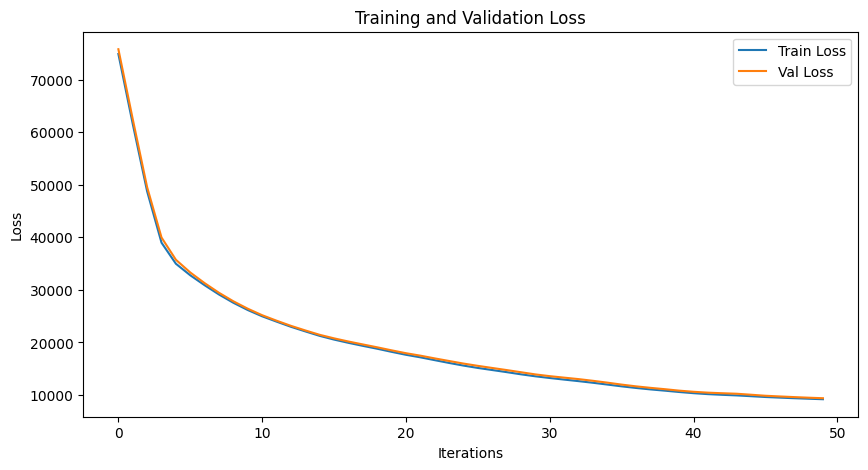

Epoch [28500/50000] Train Loss: 9095.5020 Val Loss: 9288.5820


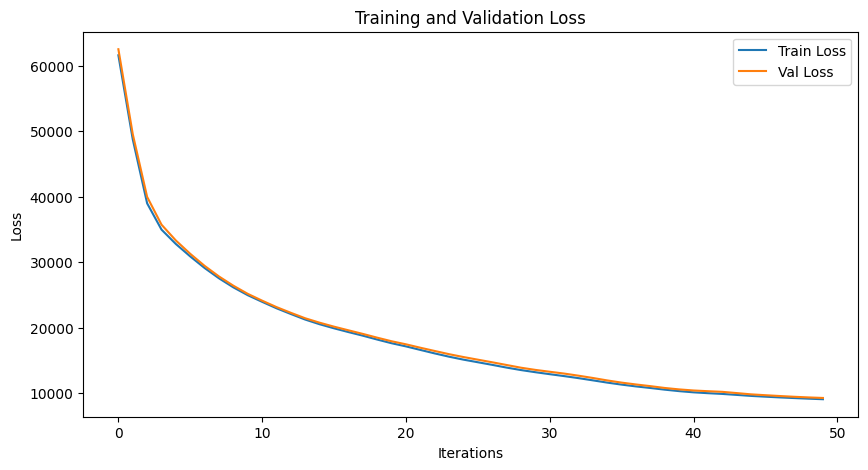

Epoch [29000/50000] Train Loss: 9013.4062 Val Loss: 9200.3916


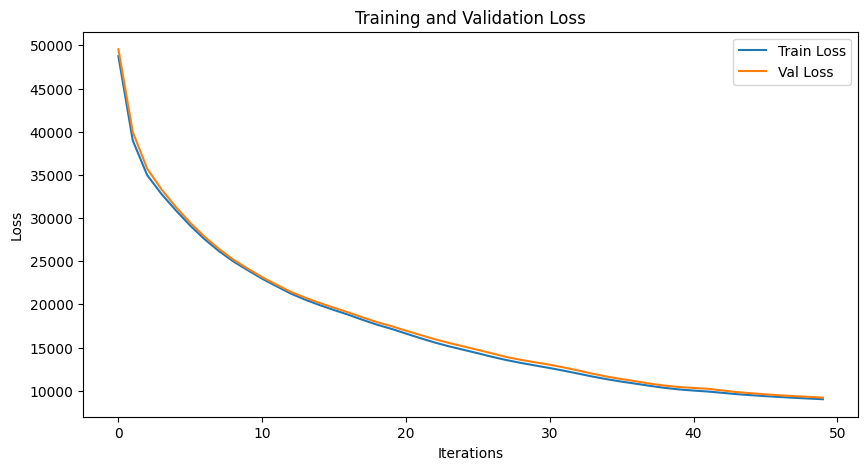

Epoch [29500/50000] Train Loss: 8940.9404 Val Loss: 9115.5078


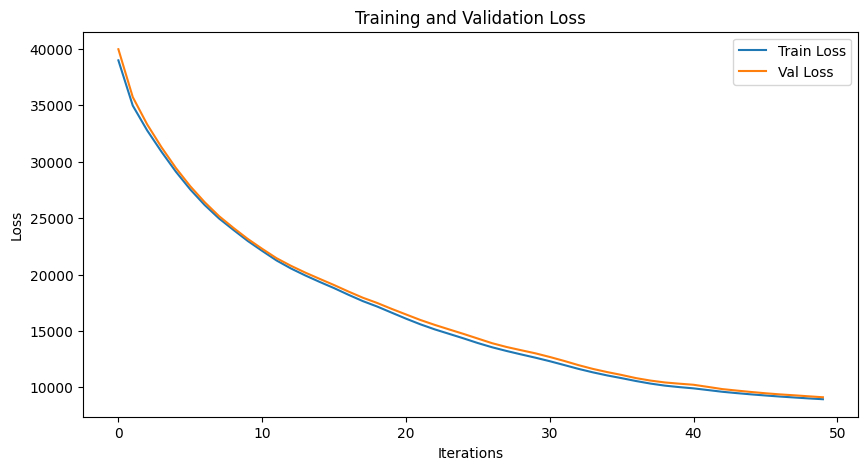

Epoch [30000/50000] Train Loss: 8868.9033 Val Loss: 9010.6680


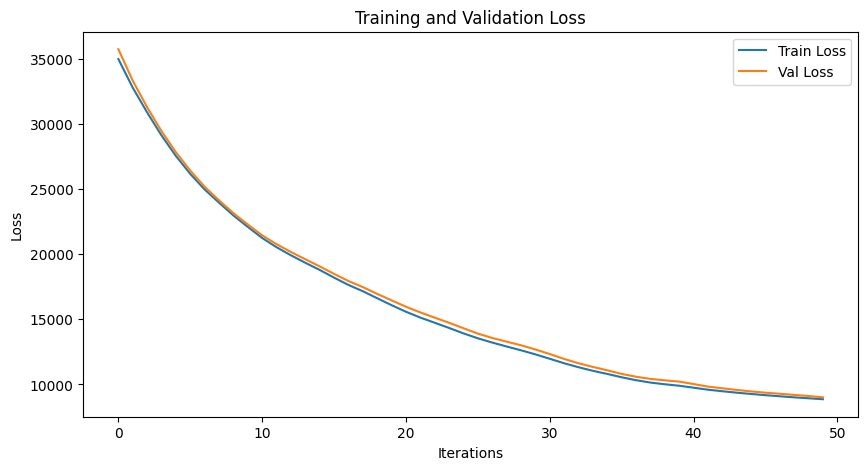

Epoch [30500/50000] Train Loss: 8799.2969 Val Loss: 8907.1172


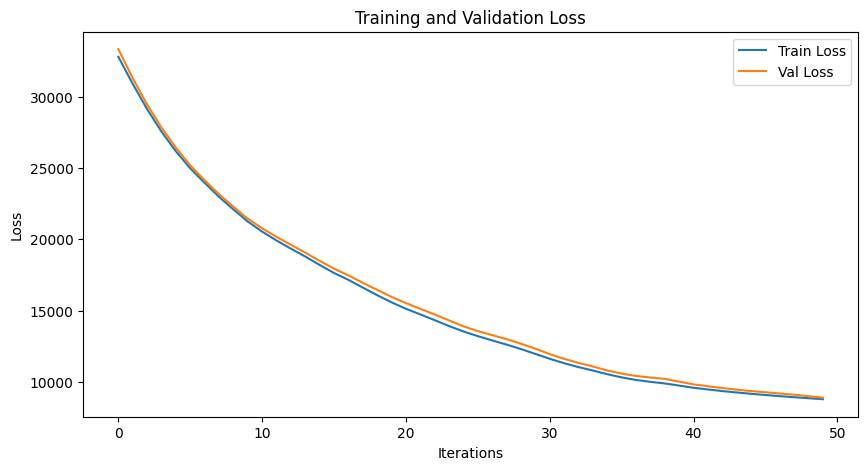

Epoch [31000/50000] Train Loss: 8716.6553 Val Loss: 8801.3447


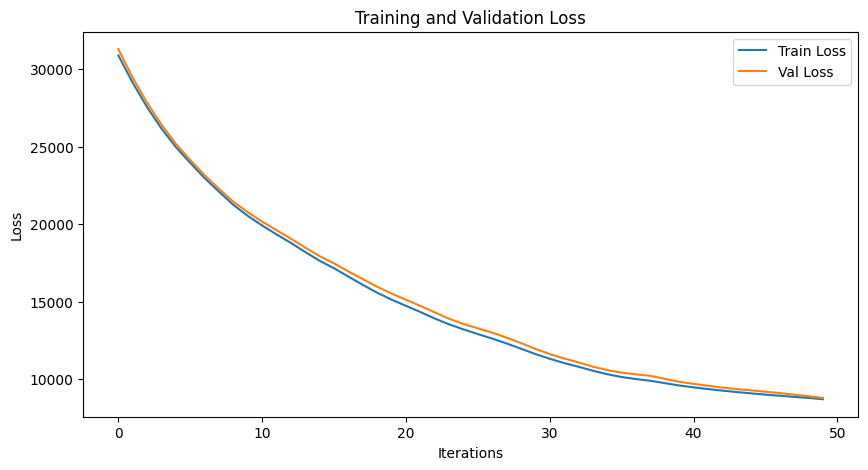

Epoch [31500/50000] Train Loss: 8635.5244 Val Loss: 8689.4297


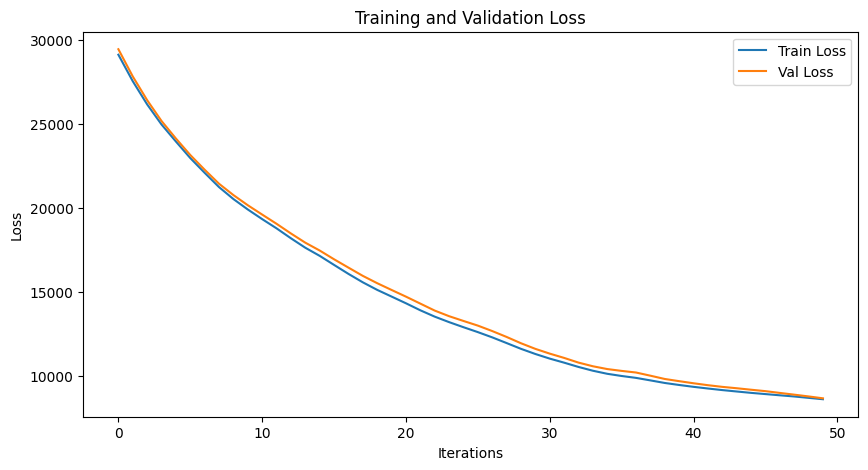

Epoch [32000/50000] Train Loss: 8548.9580 Val Loss: 8589.2979


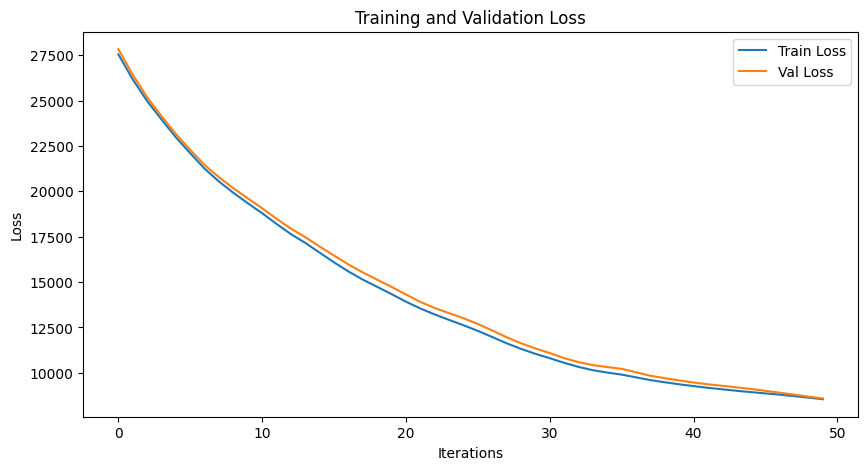

Epoch [32500/50000] Train Loss: 8472.1221 Val Loss: 8505.8613


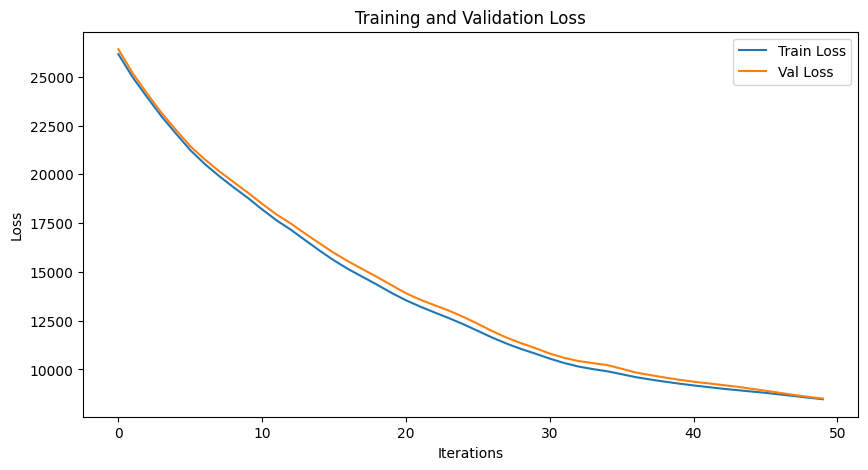

Epoch [33000/50000] Train Loss: 8401.6689 Val Loss: 8433.6475


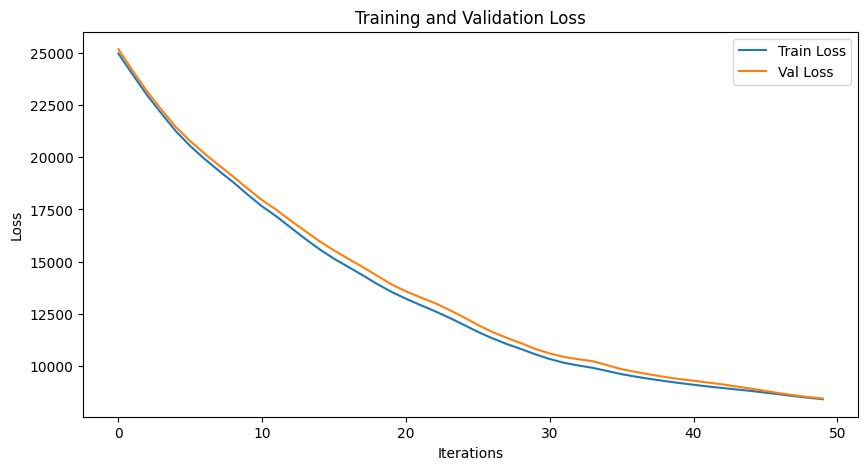

Epoch [33500/50000] Train Loss: 8348.6113 Val Loss: 8377.3838


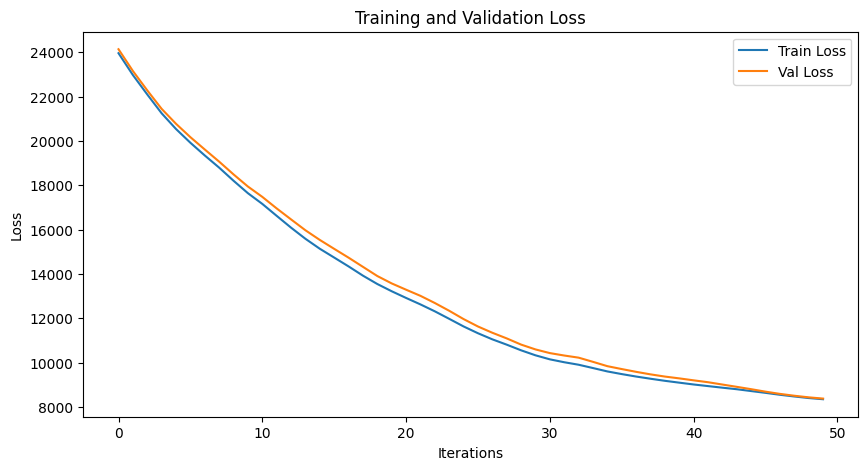

Epoch [34000/50000] Train Loss: 8295.6904 Val Loss: 8329.4551


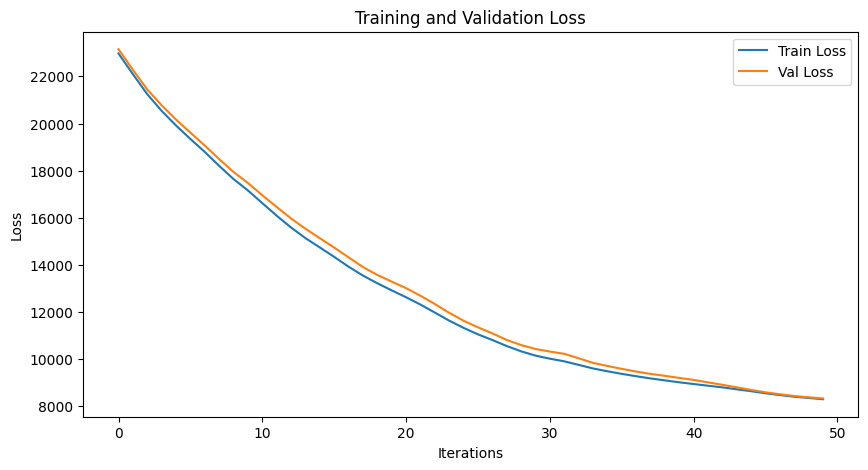

Epoch [34500/50000] Train Loss: 8219.9990 Val Loss: 8264.1543


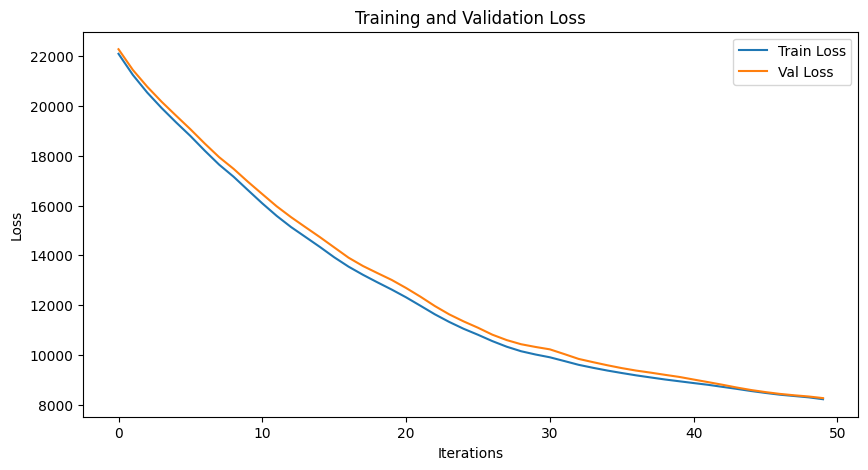

Epoch [35000/50000] Train Loss: 8123.2227 Val Loss: 8162.9741


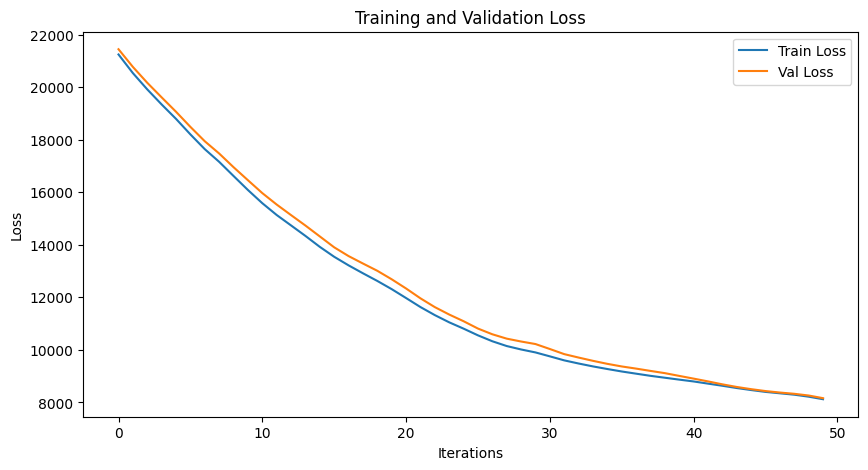

Epoch [35500/50000] Train Loss: 8034.6899 Val Loss: 8079.4727


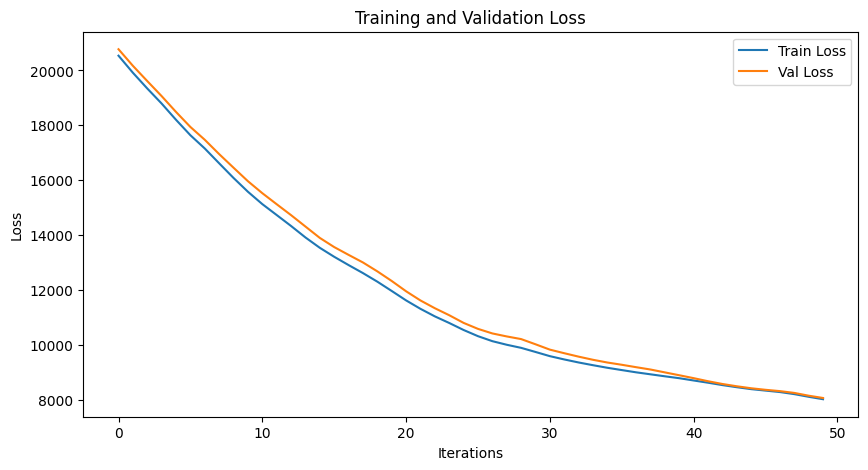

Epoch [36000/50000] Train Loss: 7932.0908 Val Loss: 7997.9575


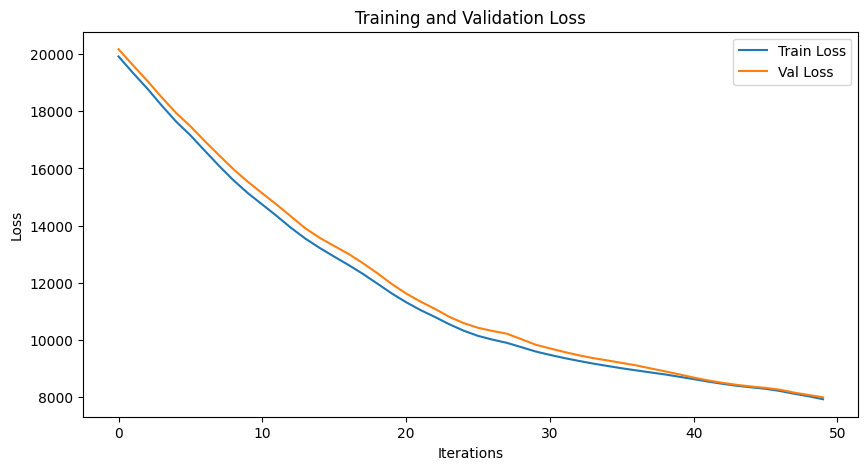

Epoch [36500/50000] Train Loss: 7852.1709 Val Loss: 7933.5068


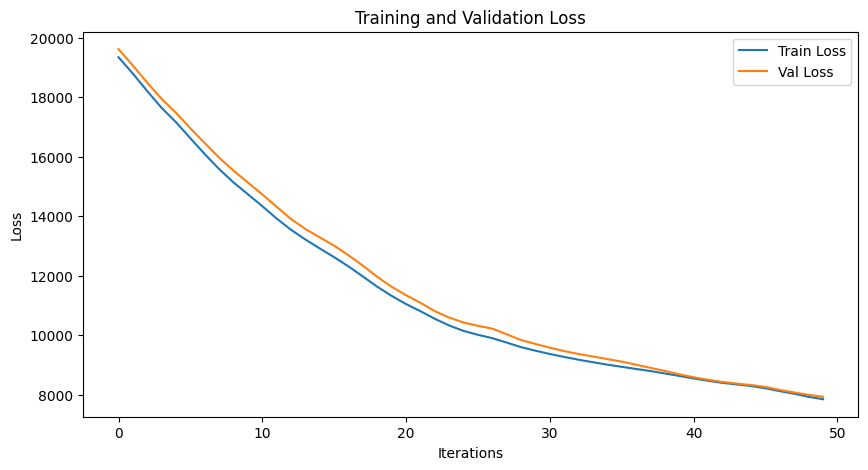

Epoch [37000/50000] Train Loss: 7777.3306 Val Loss: 7880.1333


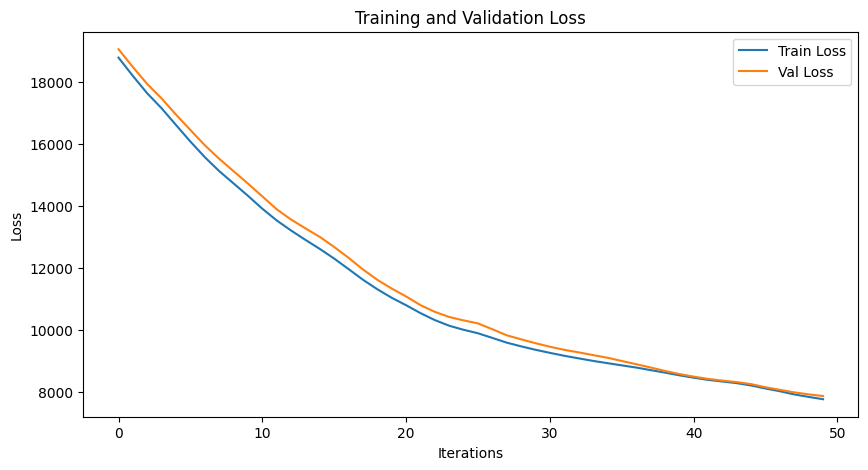

Epoch [37500/50000] Train Loss: 7715.3765 Val Loss: 7832.4712


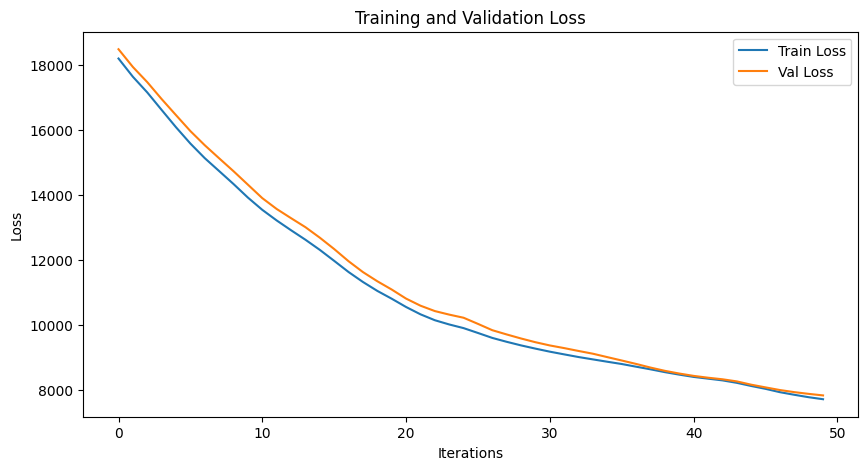

Epoch [38000/50000] Train Loss: 7650.4976 Val Loss: 7786.3003


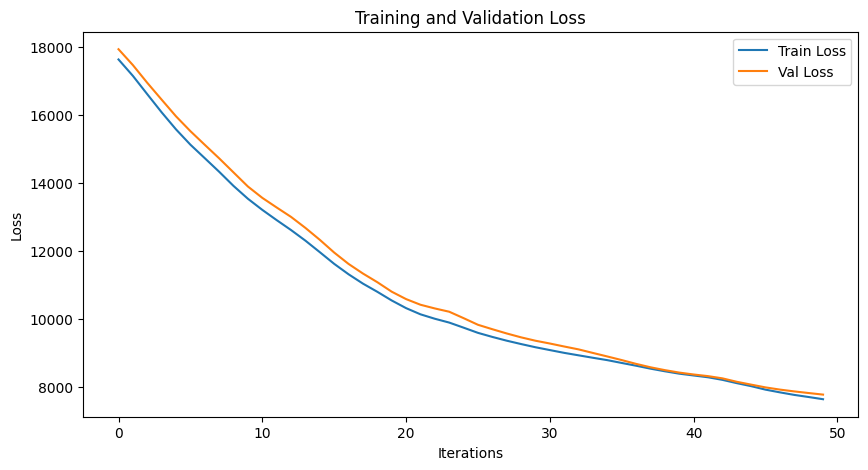

Epoch [38500/50000] Train Loss: 7588.0688 Val Loss: 7746.0352


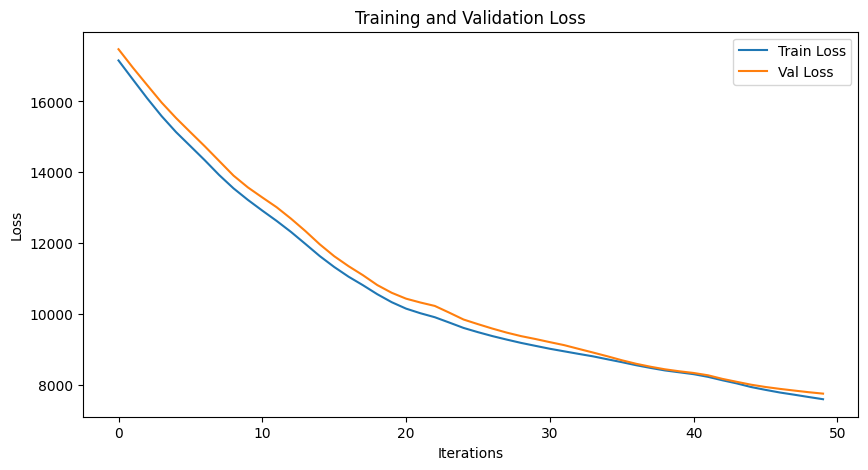

Epoch [39000/50000] Train Loss: 7534.1768 Val Loss: 7707.3306


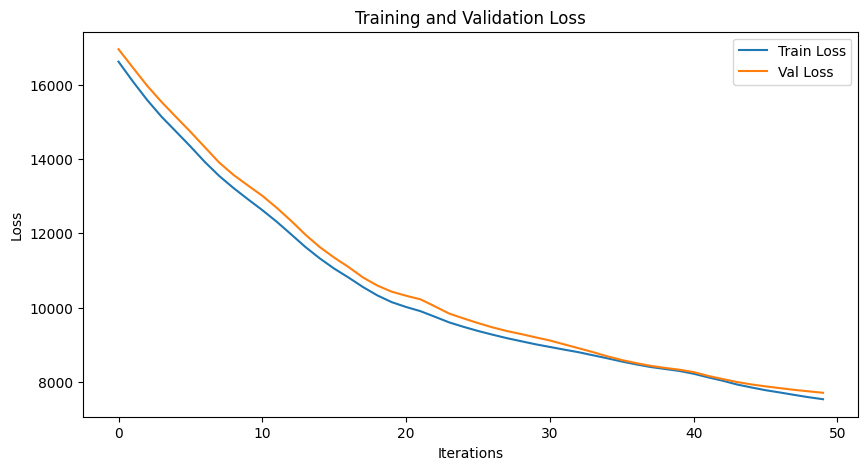

Epoch [39500/50000] Train Loss: 7487.0649 Val Loss: 7671.2080


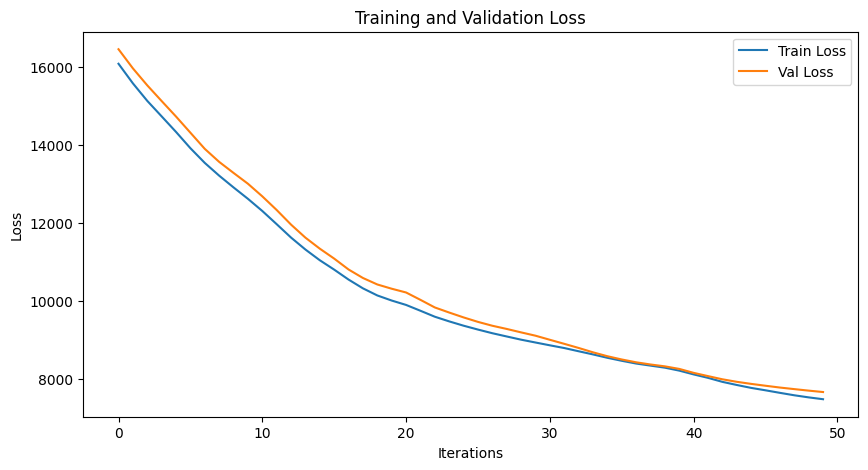

Epoch [40000/50000] Train Loss: 7439.9878 Val Loss: 7625.2554


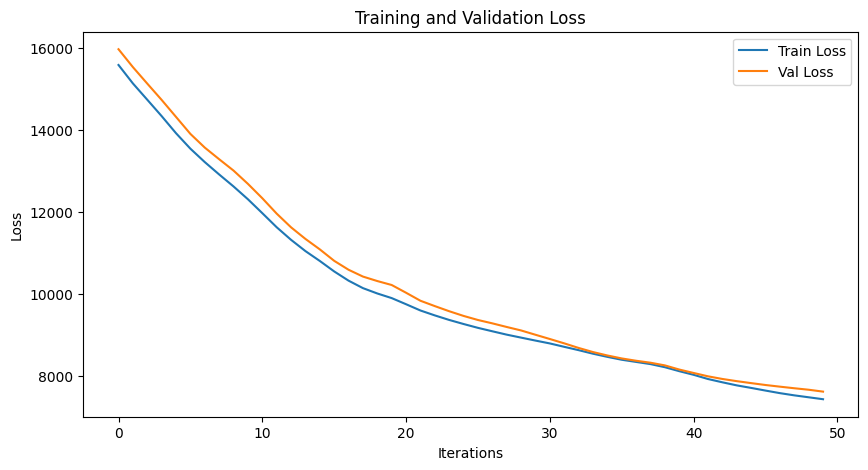

Epoch [40500/50000] Train Loss: 7400.6660 Val Loss: 7578.8711


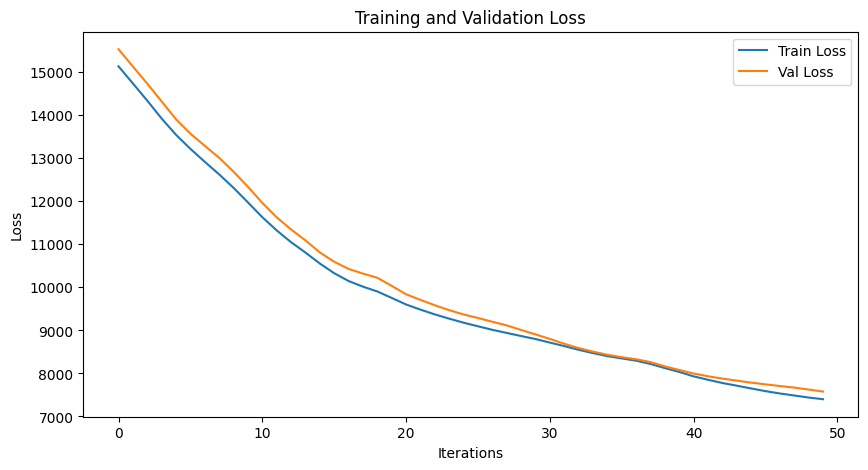

Epoch [41000/50000] Train Loss: 7365.5005 Val Loss: 7545.6660


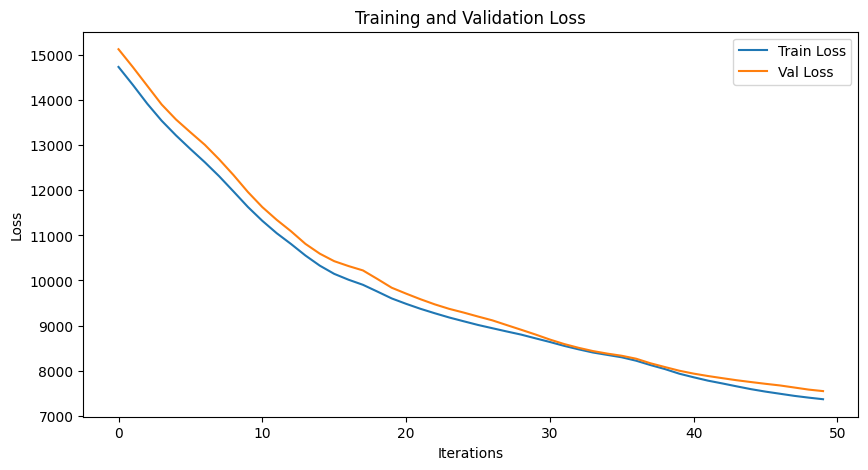

Epoch [41500/50000] Train Loss: 7330.5601 Val Loss: 7516.0166


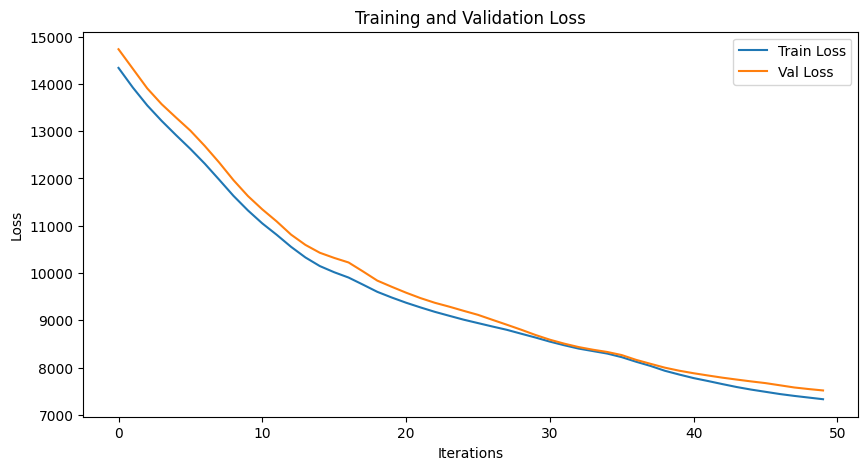

Epoch [42000/50000] Train Loss: 7297.0928 Val Loss: 7488.1655


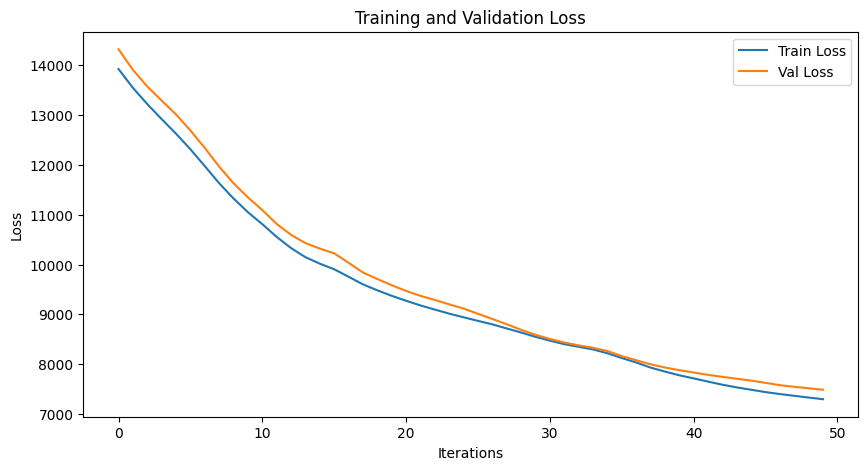

Epoch [42500/50000] Train Loss: 7263.4219 Val Loss: 7455.7554


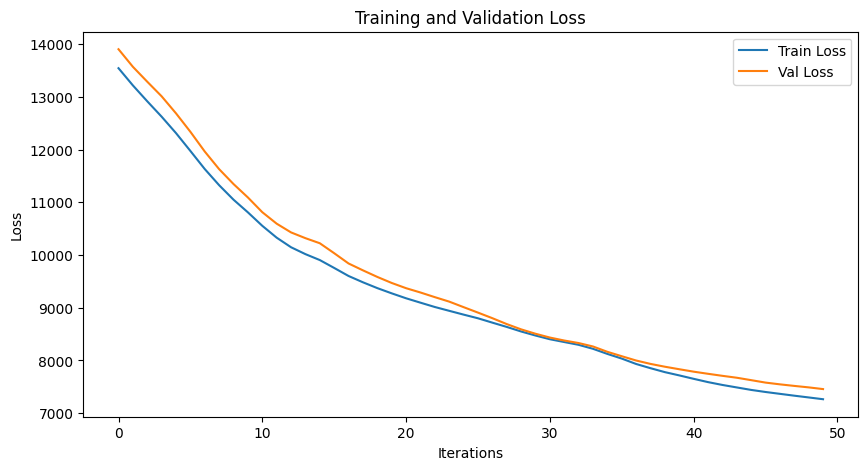

Epoch [43000/50000] Train Loss: 7228.2246 Val Loss: 7412.8940


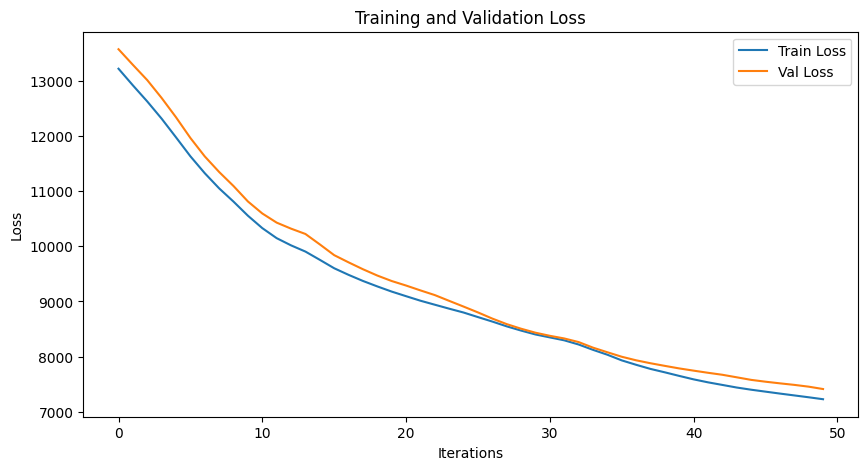

Epoch [43500/50000] Train Loss: 7192.2651 Val Loss: 7377.7227


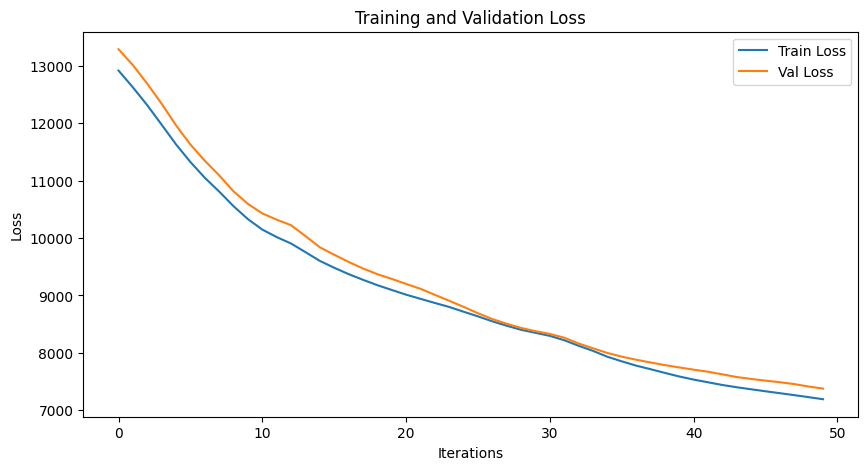

Epoch [44000/50000] Train Loss: 7152.9771 Val Loss: 7346.9468


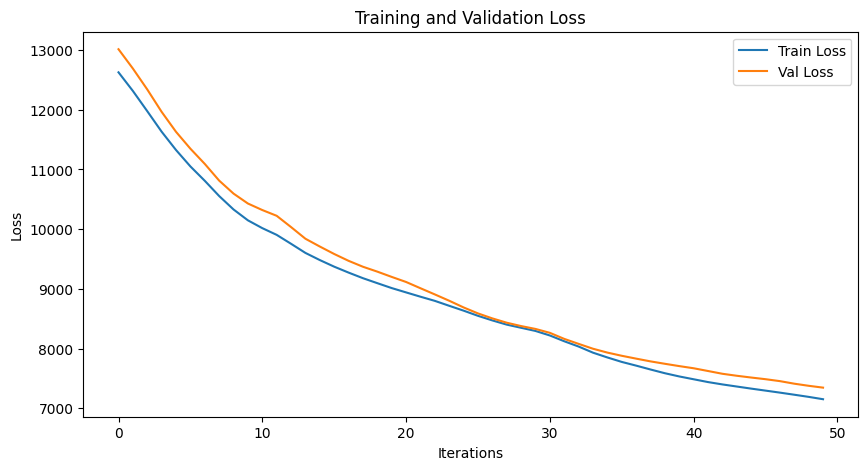

Epoch [44500/50000] Train Loss: 7115.7188 Val Loss: 7324.5479


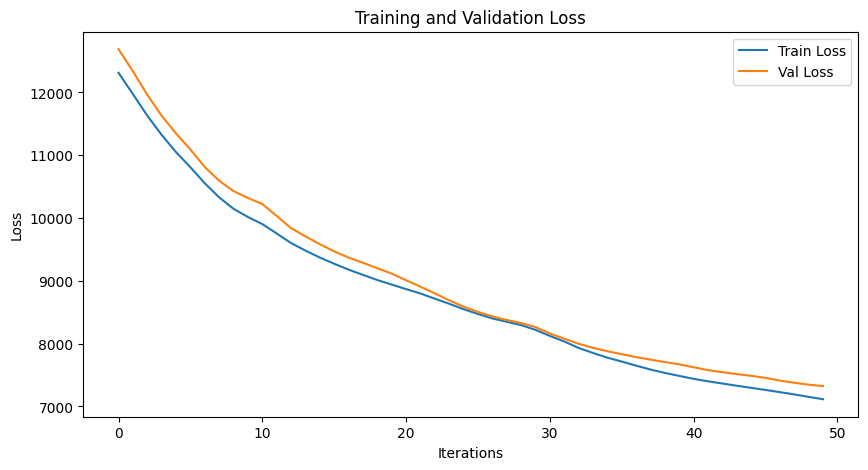

Epoch [45000/50000] Train Loss: 7066.8022 Val Loss: 7275.2646


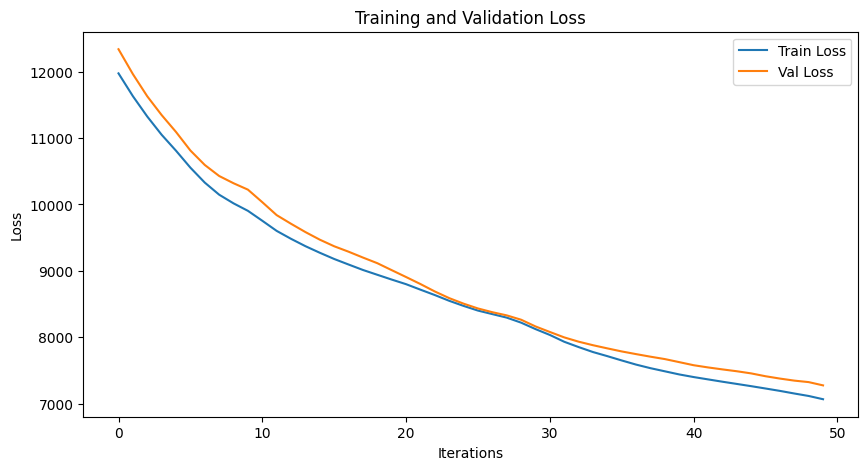

Epoch [45500/50000] Train Loss: 7030.1143 Val Loss: 7245.5640


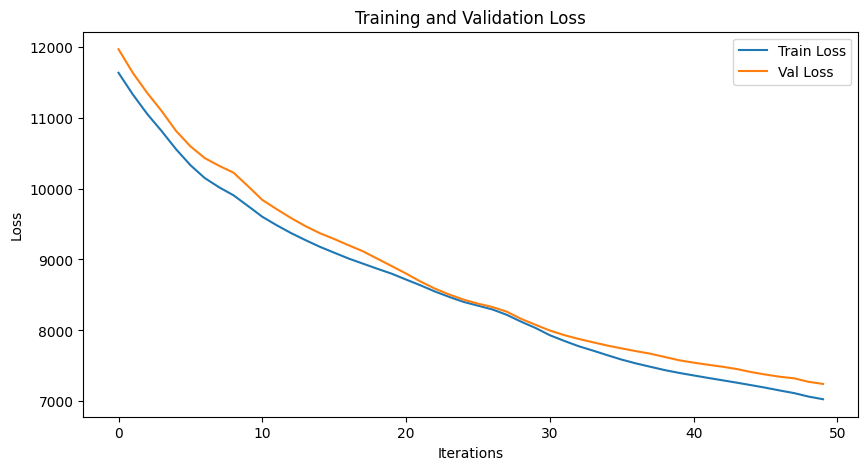

Epoch [46000/50000] Train Loss: 6996.7866 Val Loss: 7220.5337


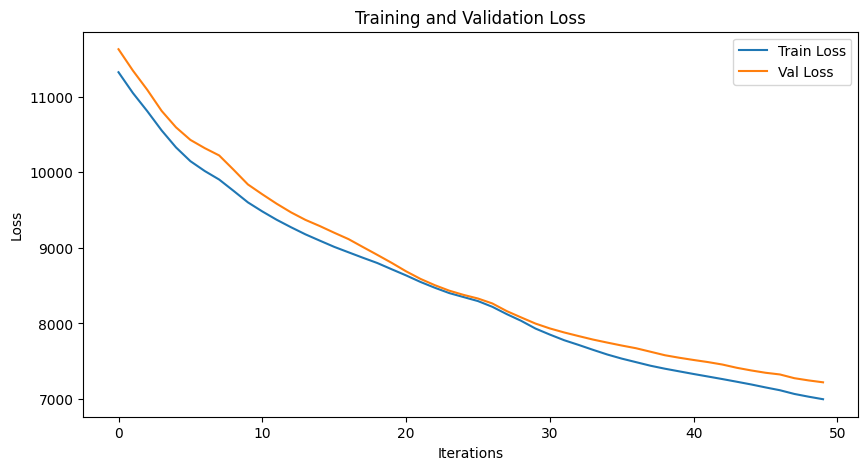

Epoch [46500/50000] Train Loss: 6966.9692 Val Loss: 7193.7319


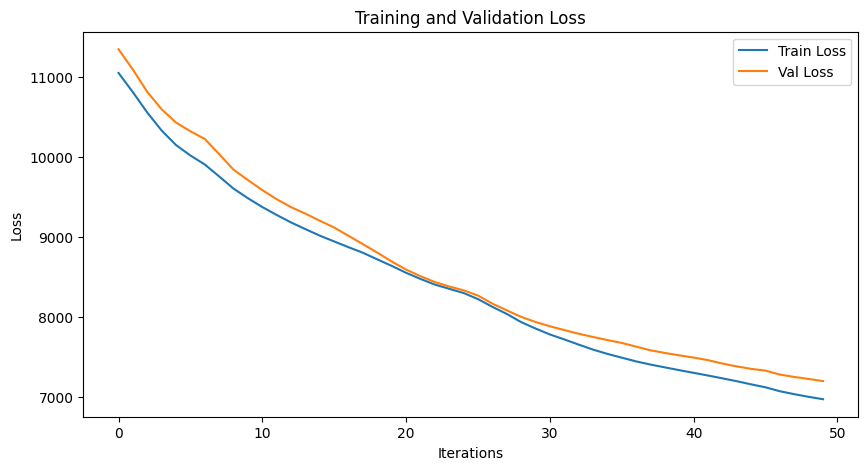

Epoch [47000/50000] Train Loss: 6938.6309 Val Loss: 7163.9893


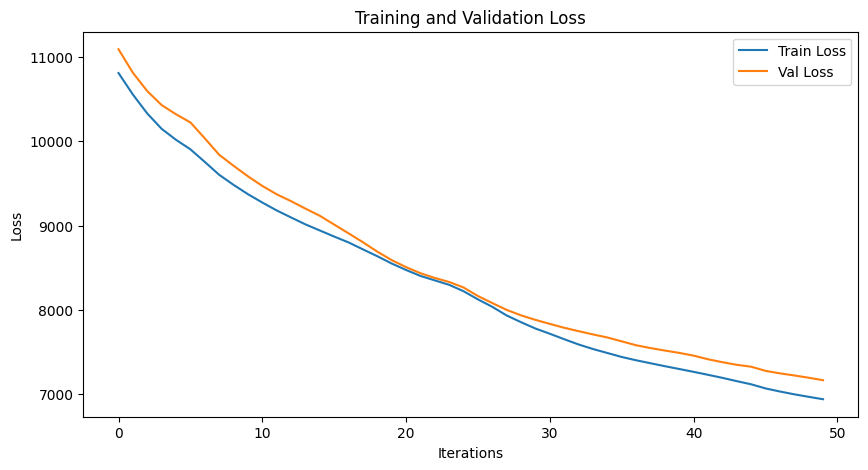

Epoch [47500/50000] Train Loss: 6908.5107 Val Loss: 7131.5928


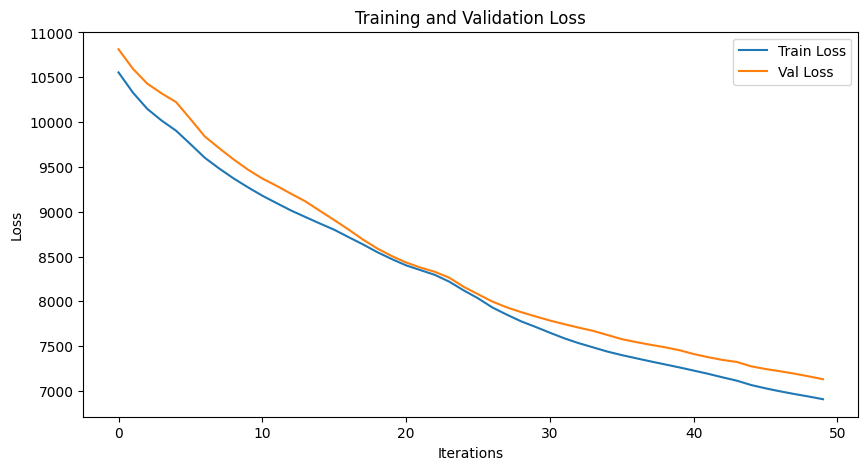

Epoch [48000/50000] Train Loss: 6881.1338 Val Loss: 7103.4663


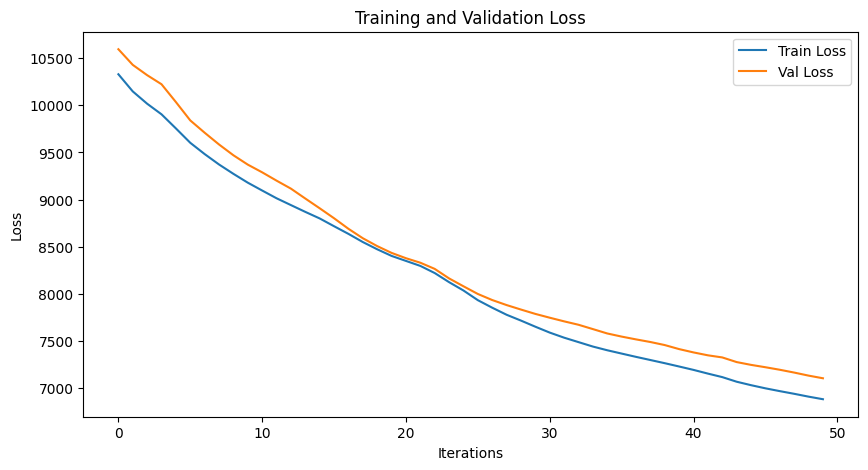

Epoch [48500/50000] Train Loss: 6855.4780 Val Loss: 7072.2441


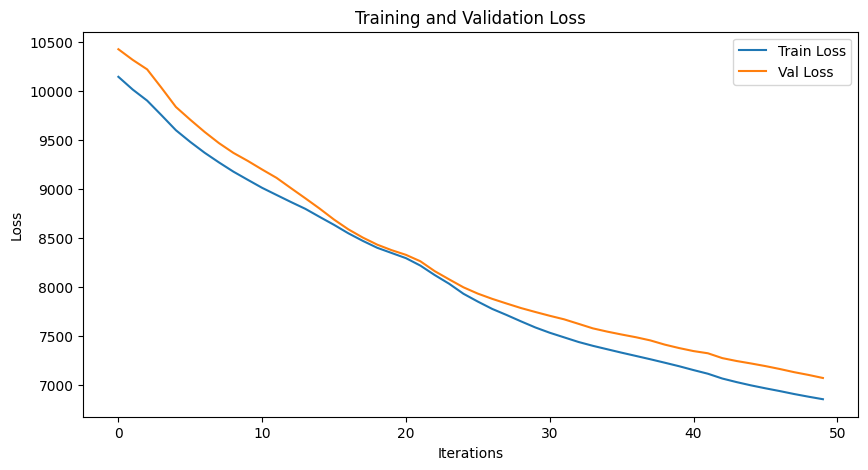

Epoch [49000/50000] Train Loss: 6827.4966 Val Loss: 7039.1396


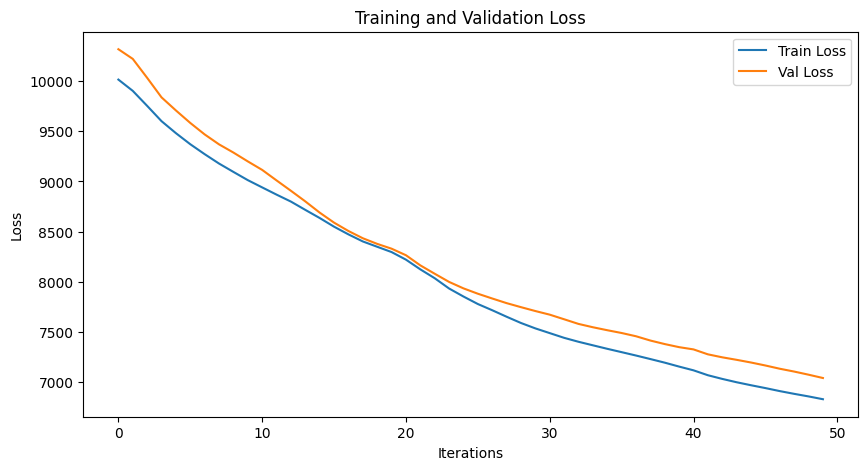

Epoch [49500/50000] Train Loss: 6790.4595 Val Loss: 7009.7666


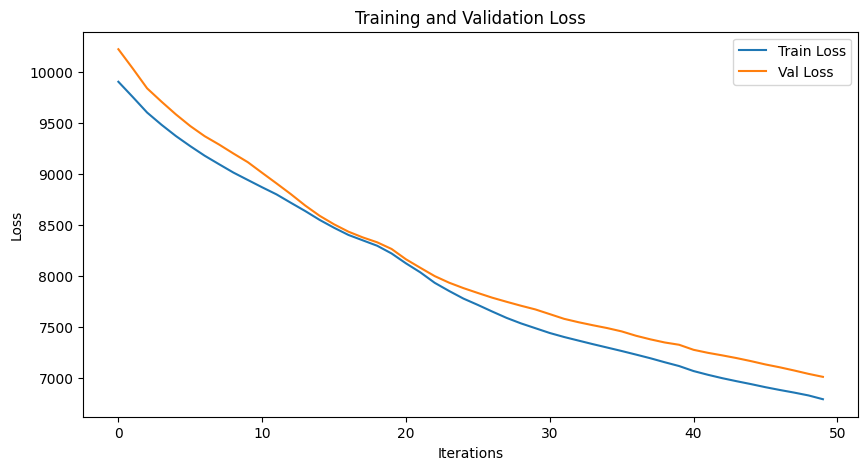

Epoch [50000/50000] Train Loss: 6755.6616 Val Loss: 6988.6890


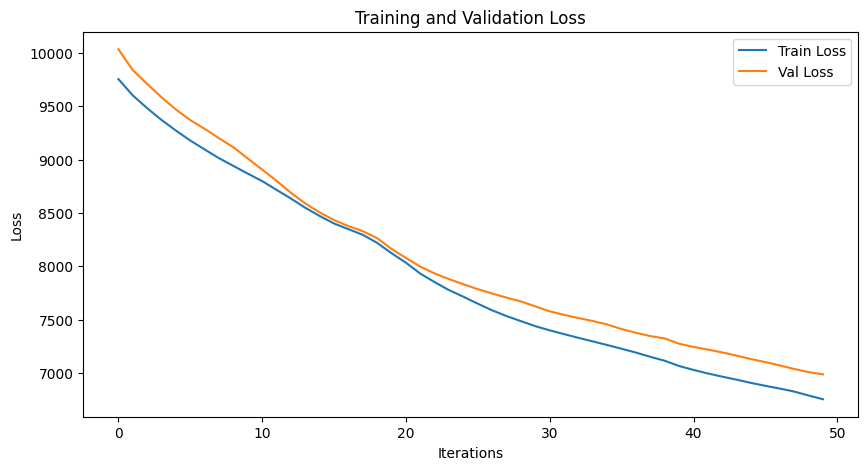

In [27]:
# Inicializar listas para almacenar las pérdidas
train_loss_values = []
val_loss_values = []

# Entrenamiento del modelo
epochs = 50000  # Ajusta según tu caso
log_interval = 500

for epoch in range(epochs):
    # --- TRAIN PHASE ---
    model.train()
    optimizer.zero_grad()

    # 1) Forward (solo X_train_tensor si no hay otra entrada)
    predictions = model(X_train_tensor)
    
    # 2) Cálculo de la pérdida en entrenamiento
    train_loss = criterion(predictions, y_train_tensor)

    # 3) Backprop
    train_loss.backward()

    # 4) Actualización de parámetros
    optimizer.step()
    
    # --- VALIDATION PHASE (cada X iteraciones) ---
    if (epoch + 1) % log_interval == 0:
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val_tensor)
            val_loss = criterion(val_predictions, y_val_tensor)

        # Almacenar valores de pérdida para gráficas
        train_loss_values.append(train_loss.item())
        val_loss_values.append(val_loss.item())

        # Mostrar progreso
        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Train Loss: {train_loss.item():.4f} "
              f"Val Loss: {val_loss.item():.4f}")

        # Gráfica de pérdidas (en tiempo real)
        plt.figure(figsize=(10, 5))
        plt.plot(train_loss_values[-50:], label='Train Loss')
        plt.plot(val_loss_values[-50:], label='Val Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()
        plt.close()  # Cerramos la figura para evitar acumulación de gráficos


In [28]:
# Evaluación del modelo
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    test_loss = criterion(y_pred_test, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

    for i,j in zip(y_pred_test, y_test_tensor):
        print(i,j)

Test Loss: 8755.8525
tensor([164580.3750]) tensor([135853.])
tensor([76564.5547]) tensor([72000.])
tensor([187181.8906]) tensor([185000.])
tensor([169467.5781]) tensor([152944.])
tensor([75467.3438]) tensor([80000.])
tensor([112224.8984]) tensor([115000.])
tensor([185637.]) tensor([185000.])
tensor([129326.4688]) tensor([131000.])
tensor([96240.8828]) tensor([45000.])
tensor([103125.2109]) tensor([101000.])
tensor([209776.6406]) tensor([200000.])
tensor([128525.7969]) tensor([130000.])
tensor([154969.2500]) tensor([181699.])
tensor([151317.0781]) tensor([140000.])
tensor([155262.8594]) tensor([160000.])
tensor([197197.8125]) tensor([195000.])
tensor([96804.4531]) tensor([110000.])
tensor([55584.2422]) tensor([60000.])
tensor([147592.4062]) tensor([150301.])
tensor([175530.3750]) tensor([180000.])
tensor([188440.2188]) tensor([140000.])
tensor([140356.6875]) tensor([140000.])
tensor([102354.3125]) tensor([95000.])
tensor([60099.2656]) tensor([45000.])
tensor([53943.3203]) tensor([50000.